Name - Dhanashree Bhor




In [ ]:
# MOUNTING THE GOOGLE DRIVE TO ACCESS THE FILE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#IMPORTING LIBRARY NUMPY,PANDAS,SEABORN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)  #USED TO SET THE DISPLAY OF THE WHOLE RECORD IN OUTPUT
pd.set_option('display.max_columns', None)  #USED TO SET THE DISPLAY OF THE WHOLE COLUMNS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_squared_error


In [ ]:
#reading the application data as df_app
df_app=pd.read_csv("/content/drive/MyDrive/Dataset/application_data.csv")

In [ ]:
#reading the previous application data as df_prev
df_prev=pd.read_csv("/content/drive/MyDrive/Dataset/previous_application.csv") #reading the previous application data

In [ ]:
#reading the columns description and giving latin 1 format as info_col
info_col=pd.read_csv("/content/drive/MyDrive/Dataset/previous_application.csv",encoding="latin1")

In [ ]:
#creating the  copy of the main data
df_app_copy=df_app
df_prev_copy=df_prev

In [ ]:
#checking the loaded data

In [ ]:
df_app.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [ ]:
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [ ]:
#get the no. of rows and columns of the data
df_app.shape

(307511, 122)

In [ ]:
#checking the info
df_app.info(verbose=True)
#by giving verbose = True, it will give all the information about all the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [ ]:
#get all the statistical information for the numeric columns
df_app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [ ]:
#check for the null values

In [ ]:
(df_app.isnull().sum()/len(df_app)*100).sort_values(ascending = False).head(50)
## Finding out the columns with their corresponding null values percentage in descending order, to find out which columns having highest null values

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [ ]:
#getting all the columns which has more than 35% null values
empty=df_app.isnull().sum()/len(df_app)*100
empty=empty[empty>35]
empty

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

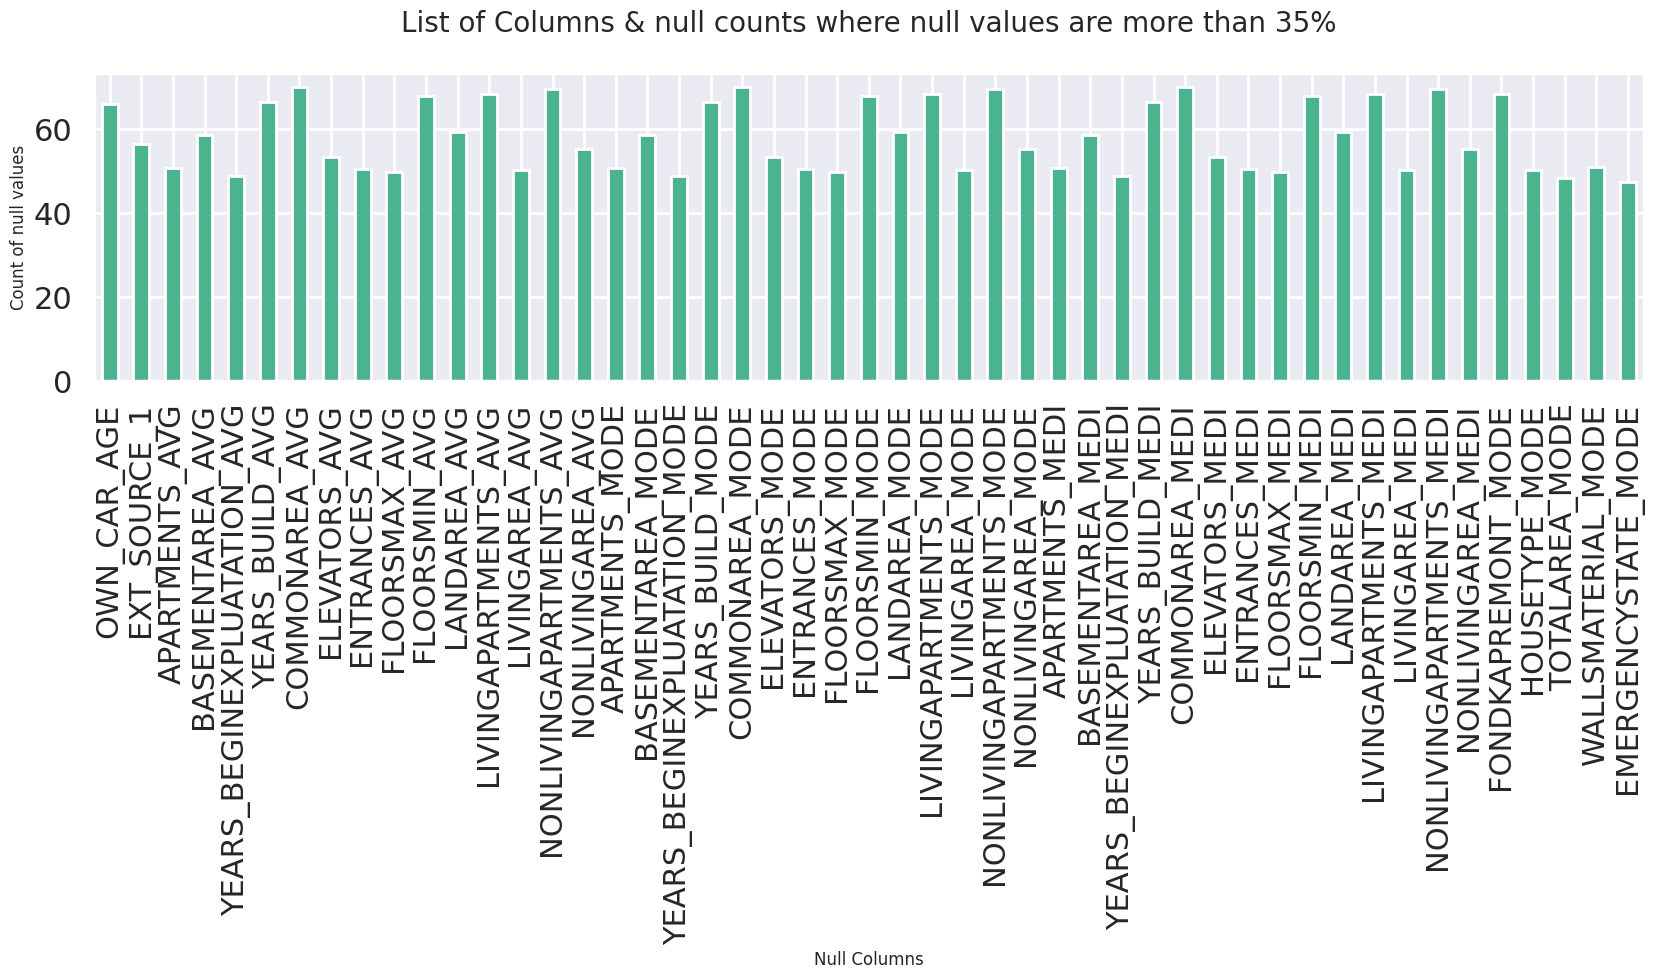

In [ ]:
#Plotting Bar Graph for null values greater than 35%

plt.figure(figsize=(20,4))
empty.plot(kind='bar', color="#4CB391")
plt.title('List of Columns & null counts where null values are more than 35%')

plt.xlabel("Null Columns",fontdict={"fontsize":12,"fontweight":5})                  #Setting X-label and Y-label
plt.ylabel("Count of null values",fontdict={"fontsize":12,"fontweight":5})
plt.show()


In [ ]:
#checking the total numbers of columns in application which has more than 30% null value
len(empty)

49

# Deleting columns which are having  Null Values greater than 35%
- From the above plot it can be observed that many columns have null values greater than 35%
- As the null value percentage is increasing, it will become difficult to handle missing data
- Hence we decide to drop the columns that are having null values more than 35%

In [ ]:
#Removing the null value

In [ ]:
empty=list(empty[empty.values>=35.0].index)  #checking the df_app data null valuess in the columns having null value greater than 35%
df_app.drop(labels=empty,axis=1,inplace=True)

In [ ]:
df_app.isnull().sum()/len(df_app)*100  #checking the null percentage again after droping the columns

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [ ]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [ ]:
df_app.shape  # checking the columns after droping the column which was having more than 35 %  of the null values
#old was (307511, 122)  new one has (307511, 73)

(307511, 73)

In [ ]:
empty1=df_prev.isnull().sum()/len(df_prev)*100  #checking the null values of each column in the prev_app datset
empty1=empty1[empty1>35]      #null values having more than 35%
empty1

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [ ]:
len(empty1)  #cheking the total numbers of null value columns which have moe than 35 % null values

11

In [ ]:
empty1=list(empty1[empty1.values>=35.0].index)   # creating a list of all the columns which have more tha 35% null values
df_prev.drop(labels=empty1,axis=1,inplace=True)  # changing the real dataset

In [ ]:
df_prev.isnull().sum()/len(df_prev)*100  #checking the null values

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [ ]:
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [ ]:
df_prev.shape  #checking the data after removing the columns which have more than 35% null values
#old data has (1670214,37) new has (1670214, 26)

(1670214, 26)

In [ ]:
#checking all columns content in df_app


In [ ]:
df_app.NAME_CONTRACT_TYPE.unique()  # checking the unique value in the name_contract_type column

array(['Cash loans', 'Revolving loans'], dtype=object)

In [ ]:
df_app.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100
# give the total percent of the data i:e cash loans consist of total 90.4% of the columns whereas Revolving loans contain only 9.5% in the

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

In [ ]:
df_app.CODE_GENDER.unique()  # checking the unique values in the gender column in the application data

array(['M', 'F', 'XNA'], dtype=object)

In [ ]:
df_app.CODE_GENDER.value_counts()  # checking the occurance of the unique values in the column

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
# there is only 4 rows for XNA so droping the XNA

In [ ]:
df_app[df_app.CODE_GENDER=='XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713      -20232         -10044   
38566                     0.026392      -13717          -2797   
83382                     0.035792      -10647          -1228   
189640                    0.035792       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657            -10024.0            -3537           1               1   
38566             -2241.0            -4659           1               1   
83382              -183.0            -1671           1               1   
189640            -4099.0            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657                  NaN              2.0                     3   
38566   Low-skill Laborers              4.0                     2   
83382           Core staff              3.0                     2   
189640                 NaN              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       0   
3

In [ ]:
df_app.drop(df_app[df_app.CODE_GENDER=='XNA'].index,inplace=True) # droping the row which having XNA in gender

In [ ]:
df_app.shape

(307507, 73)

In [ ]:
df_app.NAME_CONTRACT_TYPE.value_counts() #checking the unique value and the occurence of the valus in the column

Cash loans         278232
Revolving loans     29275
Name: NAME_CONTRACT_TYPE, dtype: int64

In [ ]:
df_app.FLAG_OWN_REALTY.value_counts()  #checking the unique value and the occurence of the valus in the column

Y    213308
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [ ]:
df_app.CNT_CHILDREN.describe()# check the description the children column

count    307507.000000
mean          0.417047
std           0.722119
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

<Axes: >

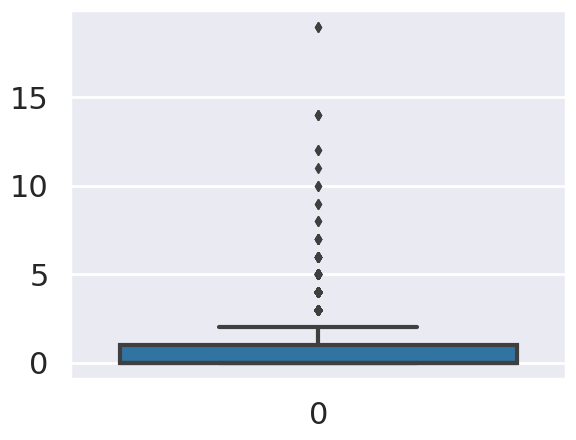

In [ ]:
sns.boxplot(df_app.CNT_CHILDREN)  #checking the outlyer

In [ ]:
df_app.AMT_INCOME_TOTAL.describe() # checking the description of the AMt income columns

count    3.075070e+05
mean     1.687977e+05
std      2.371246e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<Axes: >

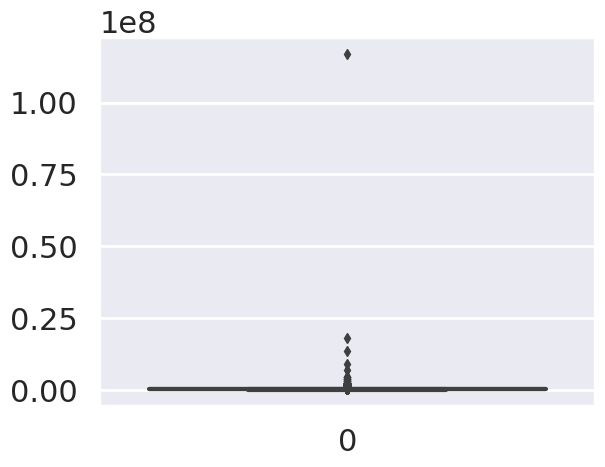

In [ ]:
sns.boxplot(df_app.AMT_INCOME_TOTAL)  #checking the outlier

In [ ]:
len(df_app[df_app.AMT_INCOME_TOTAL>25000000])


1

In [ ]:
df_app=df_app[df_app.AMT_INCOME_TOTAL<25000000]


<Axes: >

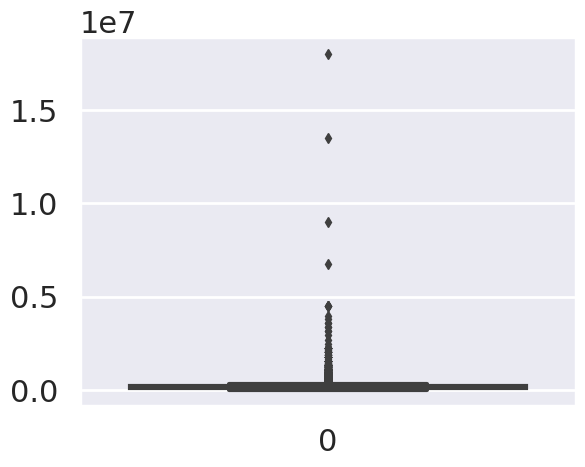

In [ ]:
sns.boxplot(df_app.AMT_INCOME_TOTAL)
# checking the outliers

In [ ]:
df_app.AMT_INCOME_TOTAL.dtype # checking the datatype of the income column


dtype('float64')

In [ ]:
df_app.AMT_CREDIT.describe()  #checking the percentile of the AMT_CREDIT column


count    3.075060e+05
mean     5.990287e+05
std      4.024933e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

<Axes: >

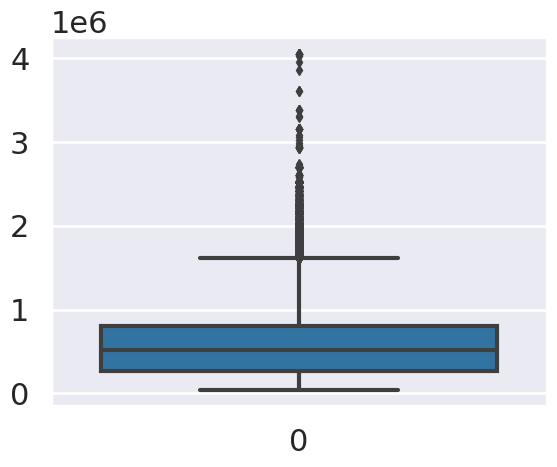

In [ ]:
sns.boxplot(df_app.AMT_CREDIT) #checking the outlier in this column

In [ ]:
df_app.AMT_ANNUITY.describe()  #checking the AMT_ANNUITY column


count    307494.000000
mean      27108.669759
std       14493.821852
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<Axes: >

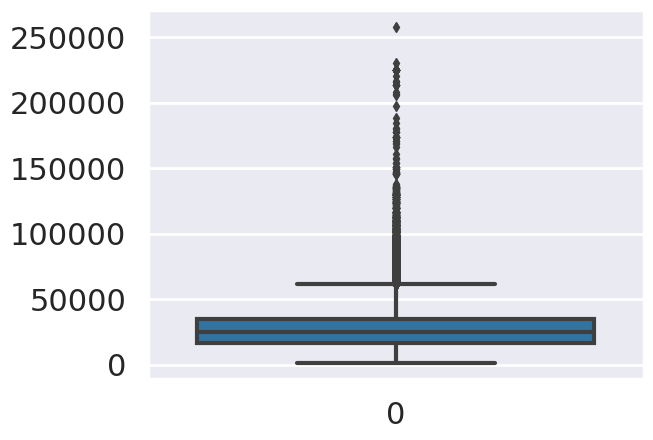

In [ ]:
sns.boxplot(df_app.AMT_ANNUITY)
# checking the outliers in AMT_ANNUITY column

In [ ]:
df_app.head() # checking the dataset again

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [ ]:
df_app.AMT_ANNUITY.describe() #checking the description of the column AMT_ANNUITY

count    307494.000000
mean      27108.669759
std       14493.821852
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [ ]:
df_app.AMT_ANNUITY.isnull().sum()  # checking the null values in the AMT_ANNUITY column

12

In [ ]:
# filling the null values in the amt_annuity column

In [ ]:
df_app.AMT_ANNUITY=df_app.AMT_ANNUITY.fillna(df_app.AMT_ANNUITY.median())
# filling the null value in the the AMT_ANNUITY column

In [ ]:
df_app.AMT_ANNUITY.isnull().sum()#checking the null values in the AMT_ANNUITY column


0

<Axes: >

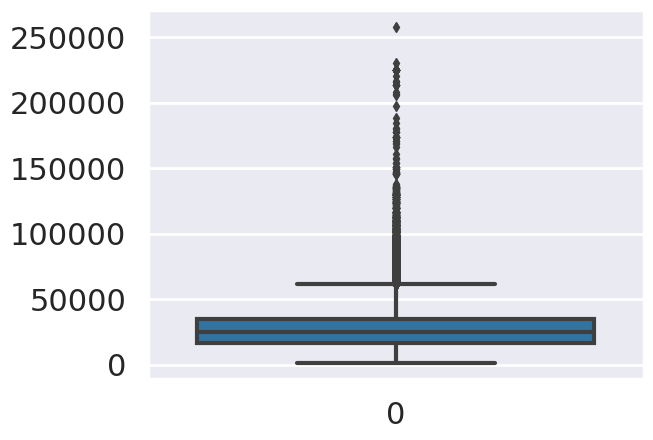

In [ ]:
sns.boxplot(df_app.AMT_ANNUITY)
#checking the outlier in the columns

<Axes: ylabel='AMT_GOODS_PRICE'>

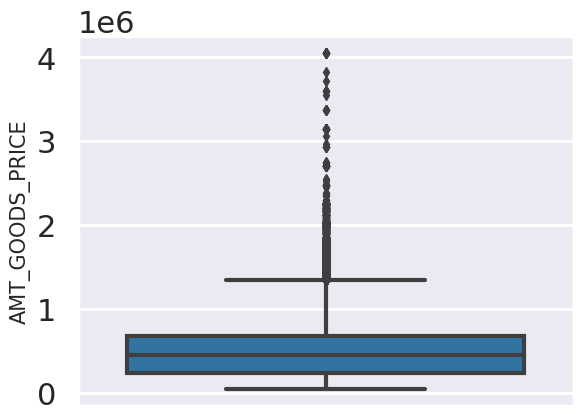

In [ ]:
sns.boxplot(y=df_app['AMT_GOODS_PRICE'])
#checking  the outlier

In [ ]:
df_app['AMT_GOODS_PRICE'].isnull().sum() # checking the null value in the column

278

In [ ]:
len(df_app[df_app['AMT_GOODS_PRICE'].isnull()])/len(df_app)*100
# checking the null value in percent in compare to the full column

0.09040474007011245

In [ ]:
df_app['AMT_GOODS_PRICE'].median()
#finding the median of the AMT_GOOD_PRICE for filling the null value

450000.0

In [ ]:
#filling the null values in the AMT_GOOD_PRICE in the column with the median
df_app['AMT_GOODS_PRICE']=df_app['AMT_GOODS_PRICE'].fillna(df_app_copy['AMT_GOODS_PRICE'].median())


In [ ]:
df_app['AMT_GOODS_PRICE'].isnull().sum() #checking the null value


0

In [ ]:
df_app.NAME_TYPE_SUITE.value_counts() #checking the counts and unique in the column


Unaccompanied      248522
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
df_app.NAME_TYPE_SUITE.isnull().sum() # checking the null value in the NAME_TYPE _SUITE column


1292

In [ ]:
#NAME_TYPE_SUITE column consist of categorical data so fill the null value with the mode
df_app.NAME_TYPE_SUITE=df_app.NAME_TYPE_SUITE.fillna(df_app.NAME_TYPE_SUITE.mode()[0])


In [ ]:
df_app.NAME_TYPE_SUITE.isnull().sum()
#checking the nullness of the column

0

In [ ]:
df_app.NAME_INCOME_TYPE.value_counts()
#checking the description of the data and the occurence of the values in the column

Working                 158770
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
#checking the value_count in the NAME_EDUCATION_TYPE
df_app.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218388
Higher education                  74862
Incomplete higher                 10276
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
#checking the value in the NAME_FAMILY_STATUS

df_app.NAME_FAMILY_STATUS.value_counts()


Married                 196428
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
#checking the NAME_HOUSE_TYPE columns for finding the occuerence of the value
df_app.NAME_HOUSING_TYPE.value_counts()



House / apartment      272864
With parents            14840
Municipal apartment     11182
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [ ]:
#checking the description of the REGION_POPULAITON_RELATIVE columns
df_app.REGION_POPULATION_RELATIVE.describe()


count    307506.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

<Axes: >

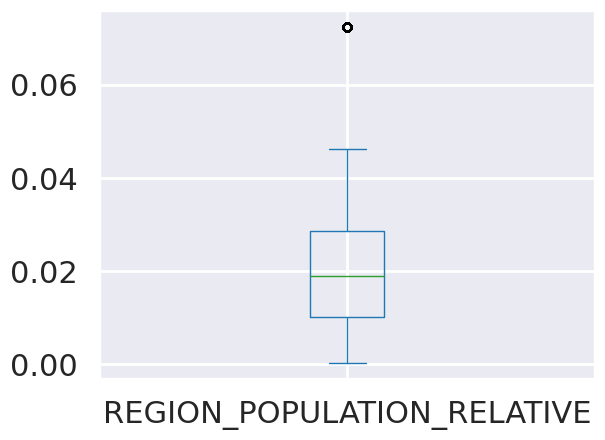

In [ ]:
#checking the outlier in the REGION_POPULATION_RELATIVE
df_app.REGION_POPULATION_RELATIVE.plot.box()


In [ ]:
df_app.DAYS_BIRTH.describe()
# there is negative values so we convert them into positive values

count    307506.000000
mean     -16037.038399
std        4363.985156
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [ ]:
df_app['DAYS_BIRTH'] = abs(df_app['DAYS_BIRTH'])


In [ ]:
df_app.DAYS_BIRTH.describe()
#checking the outlier of the DAYS_BIRTH column

count    307506.000000
mean      16037.038399
std        4363.985156
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

<Axes: >

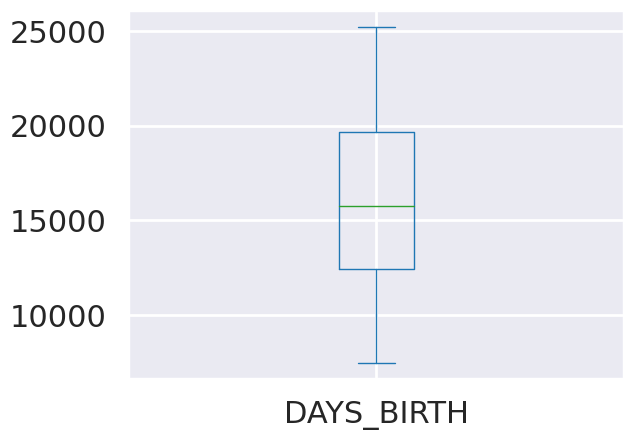

In [ ]:
#checking the description of the DAYS_EMPLOYED
df_app.DAYS_BIRTH.plot.box()


In [ ]:
df_app.DAYS_EMPLOYED.describe() #checking the description of the DAYS_EMPLOYED

count    307506.000000
mean      63816.139734
std      141276.653998
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<Axes: >

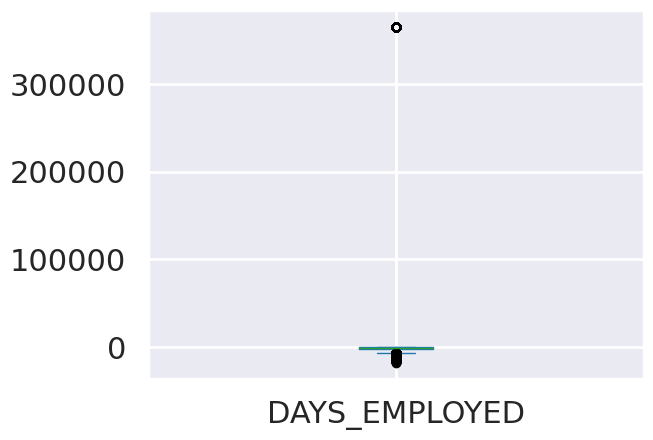

In [ ]:
df_app.DAYS_EMPLOYED.plot.box()   #checking the outlier


In [ ]:
#removing the outlier
df_app[df_app.DAYS_EMPLOYED==365243].shape  #365243 taken from the max obtain from the describe


(55374, 73)

In [ ]:
df_app.DAYS_EMPLOYED=df_app.DAYS_EMPLOYED[df_app.DAYS_EMPLOYED<365243] #removed the outliers

In [ ]:
#treating null value in days_employed

In [ ]:
df_app.DAYS_EMPLOYED.isnull().sum()
#checking the null value in the column

55374

In [ ]:
df_app.DAYS_EMPLOYED=df_app.DAYS_EMPLOYED.fillna(df_app.DAYS_EMPLOYED.median())
# filling the null values with the median

In [ ]:
df_app.DAYS_EMPLOYED.isnull().sum()
# again checking the null value in the column

0

In [ ]:
df_app.DAYS_EMPLOYED.describe()

count    307506.000000
mean      -2251.586535
std        2136.162269
min      -17912.000000
25%       -2760.000000
50%       -1648.000000
75%        -933.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
#treating the null value
df_app['DAYS_EMPLOYED'] = abs(df_app['DAYS_EMPLOYED'])


In [ ]:
df_app.DAYS_EMPLOYED.describe()


count    307506.000000
mean       2251.586535
std        2136.162269
min           0.000000
25%         933.000000
50%        1648.000000
75%        2760.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

<Axes: >

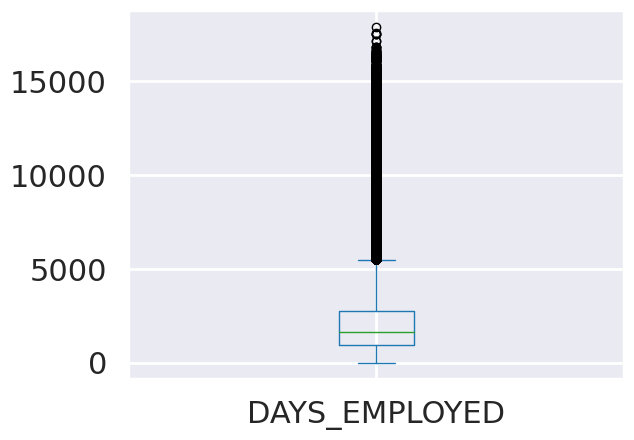

In [ ]:
df_app.DAYS_EMPLOYED.plot.box()


In [ ]:
#checking the description
df_app.DAYS_REGISTRATION.describe()


count    307506.000000
mean      -4986.125601
std        3522.887303
min      -24672.000000
25%       -7479.750000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [ ]:
#converting negative to positive value
df_app['DAYS_REGISTRATION'] = abs(df_app['DAYS_REGISTRATION'])

<Axes: >

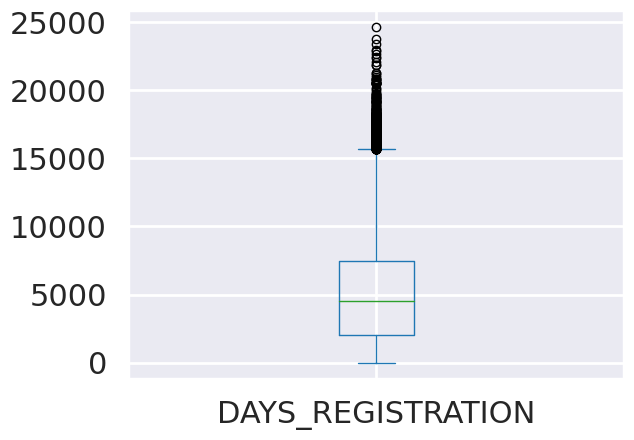

In [ ]:
# Checking the outliers
df_app.DAYS_REGISTRATION.plot.box()


In [ ]:
df_app.DAYS_REGISTRATION.describe()


count    307506.000000
mean       4986.125601
std        3522.887303
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.750000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [ ]:
df_app.DAYS_ID_PUBLISH.describe()


count    307506.000000
mean      -2994.199560
std        1509.456567
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [ ]:
df_app['DAYS_ID_PUBLISH'] = abs(df_app['DAYS_ID_PUBLISH'])
#change the ngative value to positive


<Axes: >

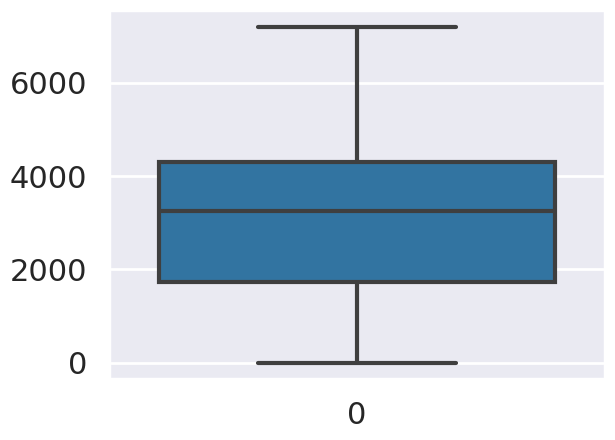

In [ ]:
sns.boxplot(df_app.DAYS_ID_PUBLISH)


In [ ]:
df_app.FLAG_MOBIL.value_counts()
# this is binary data to count the number of occurence

1    307505
0         1
Name: FLAG_MOBIL, dtype: int64

<Axes: >

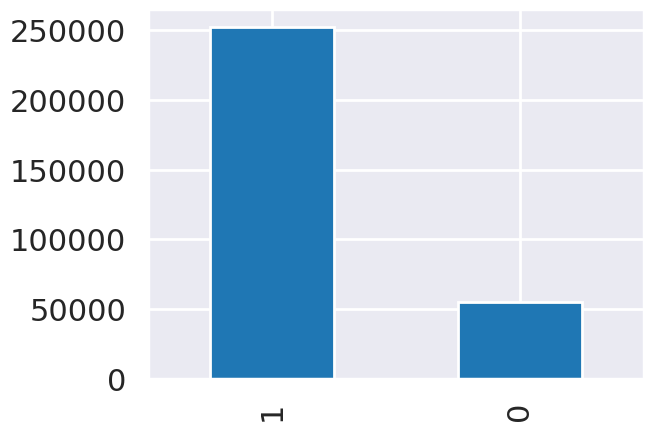

In [ ]:
# checking the total number of the binary occurance of the 1 and 0
df_app.FLAG_EMP_PHONE.value_counts().plot.bar()


<Axes: >

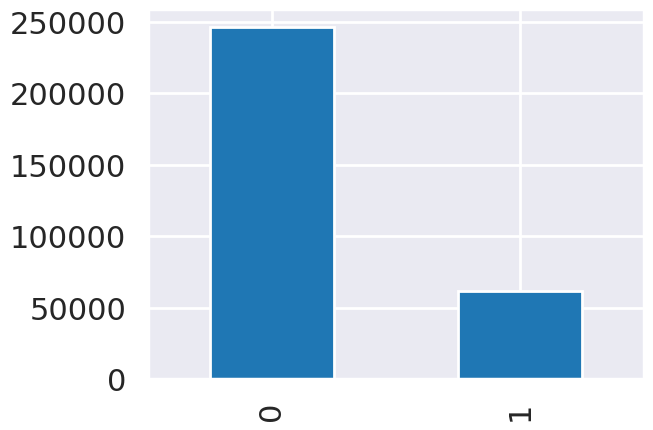

In [ ]:
df_app.FLAG_WORK_PHONE.value_counts().plot.bar()


In [ ]:
df_app.FLAG_CONT_MOBILE.value_counts()


1    306932
0       574
Name: FLAG_CONT_MOBILE, dtype: int64

<Axes: >

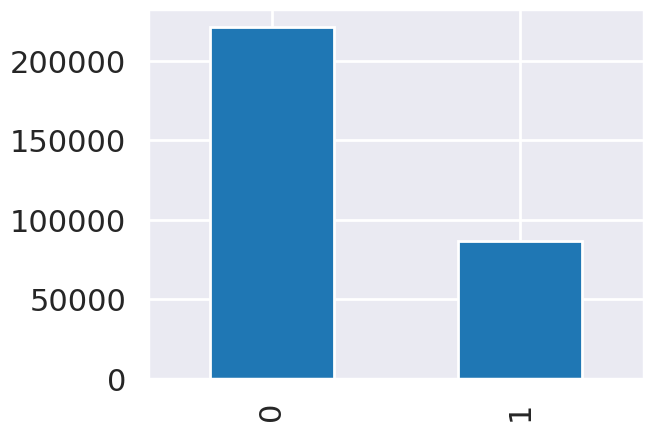

In [ ]:
df_app.FLAG_PHONE.value_counts().plot.bar()


In [ ]:
df_app.FLAG_EMAIL.value_counts()


0    290064
1     17442
Name: FLAG_EMAIL, dtype: int64

In [ ]:
df_app.OCCUPATION_TYPE.value_counts()

Laborers                 55185
Sales staff              32102
Core staff               27569
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2092
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

<Axes: >

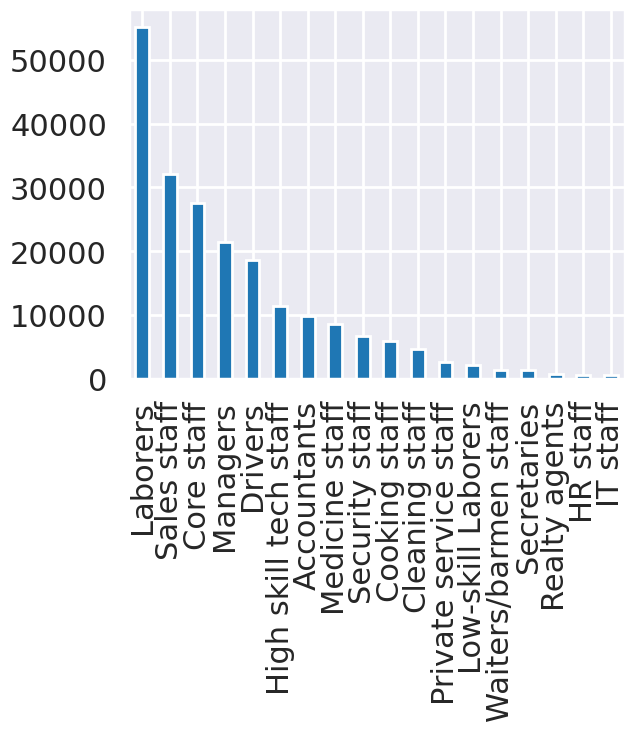

In [ ]:
df_app.OCCUPATION_TYPE.value_counts().plot.bar()


In [ ]:
#checking the null value in the columns
df_app.OCCUPATION_TYPE.isnull().sum()


96389

In [ ]:
df_app.OCCUPATION_TYPE.mode()
#checking the mode of the occupation column

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

In [ ]:
df_app.OCCUPATION_TYPE.fillna("Unknown",inplace=True)

In [ ]:
df_app.OCCUPATION_TYPE.isnull().sum()


0

In [ ]:
df_app.CNT_FAM_MEMBERS.describe()


count    307504.000000
mean          2.152655
std           0.910680
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

<Axes: >

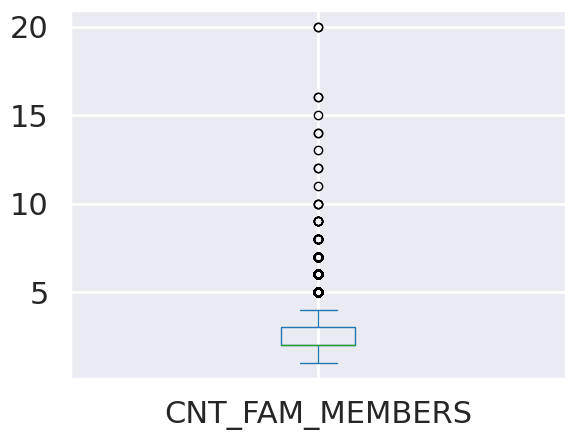

In [ ]:
df_app.CNT_FAM_MEMBERS.plot.box()


In [ ]:
df_app.CNT_FAM_MEMBERS.isnull().sum()
# checking the total number of null values in the column

2

In [ ]:
df_app.CNT_FAM_MEMBERS=df_app.CNT_FAM_MEMBERS.fillna(df_app.CNT_FAM_MEMBERS.median())
#filling the median in the null value

In [ ]:
df_app.CNT_FAM_MEMBERS.isnull().sum()
#checking the null value again after filling

0

<Axes: >

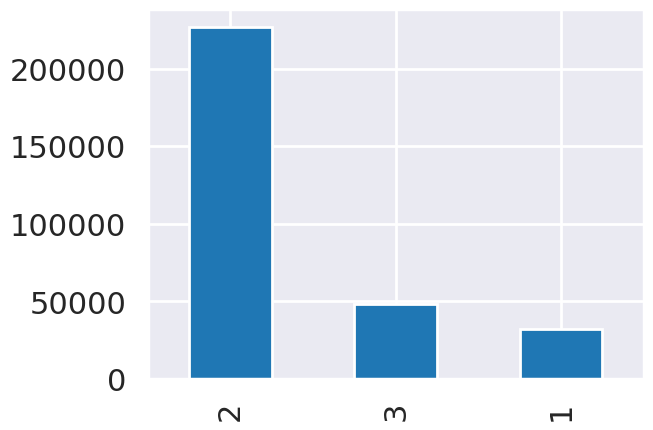

In [ ]:
df_app.REGION_RATING_CLIENT.value_counts().plot.bar()


<Axes: >

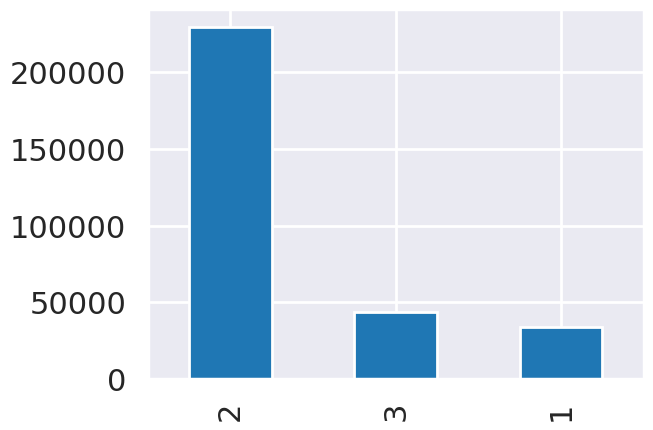

In [ ]:
df_app.REGION_RATING_CLIENT_W_CITY.value_counts().plot.bar()


<Axes: >

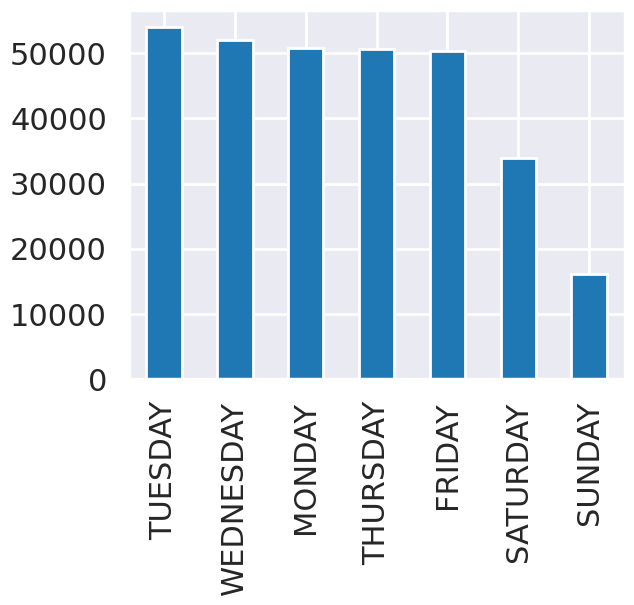

In [ ]:
df_app.WEEKDAY_APPR_PROCESS_START.value_counts().plot.bar()


In [ ]:
df_app.HOUR_APPR_PROCESS_START.value_counts()


10    37721
11    37229
12    34233
13    30959
14    27681
9     27384
15    24837
16    20384
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64

In [ ]:
df_app.REG_REGION_NOT_LIVE_REGION.value_counts()


0    302849
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

In [ ]:
df_app.REG_REGION_NOT_WORK_REGION.value_counts()


0    291894
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

In [ ]:
df_app.LIVE_REGION_NOT_WORK_REGION.value_counts()


0    295003
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

In [ ]:
df_app.REG_CITY_NOT_LIVE_CITY.value_counts()


0    283467
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

In [ ]:
df_app.REG_CITY_NOT_WORK_CITY.value_counts()


0    236639
1     70867
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

<Axes: >

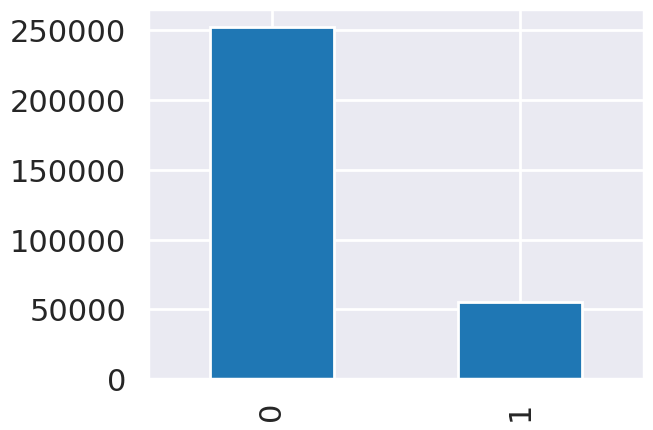

In [ ]:
df_app.LIVE_CITY_NOT_WORK_CITY.value_counts().plot.bar()


In [ ]:
df_app.ORGANIZATION_TYPE.value_counts()


Business Entity Type 3    67991
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [ ]:
#Dropping unwanted columns

In [ ]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461          637.0             3648.0   
1                    0.003541       16765         1188.0             1186.0   
2                    0.010032       19046          225.0             4260.0   
3                    0.008019       19005         3039.0             9833.0   
4                    0.028663       19932         3038.0             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

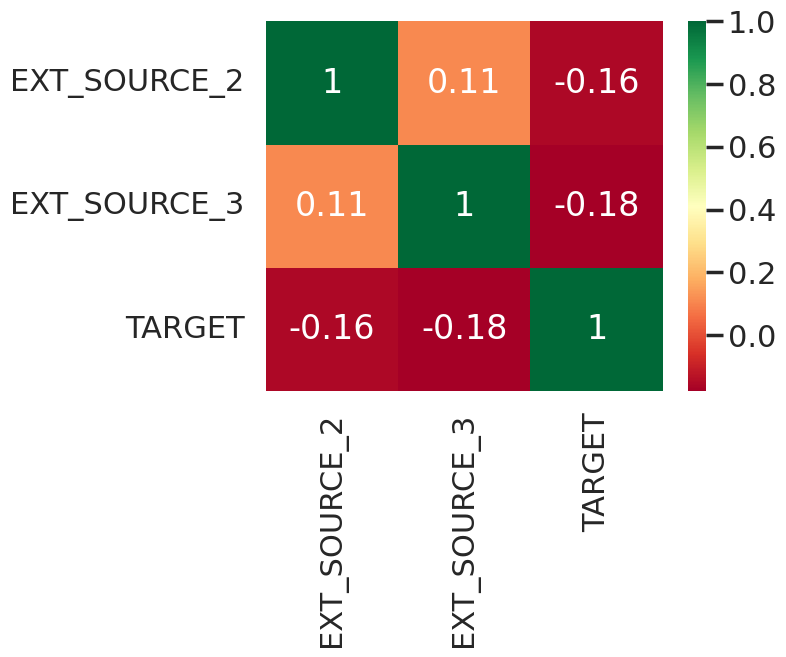

In [ ]:
unwanted = df_app[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
unwanted_corr = unwanted.corr()
ax = sns.heatmap(unwanted_corr,
            xticklabels=unwanted_corr.columns,
            yticklabels=unwanted_corr.columns,
            annot = True,
            cmap ="RdYlGn")

In [ ]:
df_app.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)
#droping the ext_source_2 and ext_source _3 from the data because there is less corealation

In [ ]:
df_app.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()


1021

In [ ]:
df_app.OBS_30_CNT_SOCIAL_CIRCLE=df_app.OBS_30_CNT_SOCIAL_CIRCLE.fillna(df_app.OBS_30_CNT_SOCIAL_CIRCLE.median())
#filling the data with median

In [ ]:
df_app.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()
#checking the null values

0

In [ ]:
df_app.OBS_30_CNT_SOCIAL_CIRCLE.describe()


count    307506.000000
mean          1.417491
std           2.398340
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: >

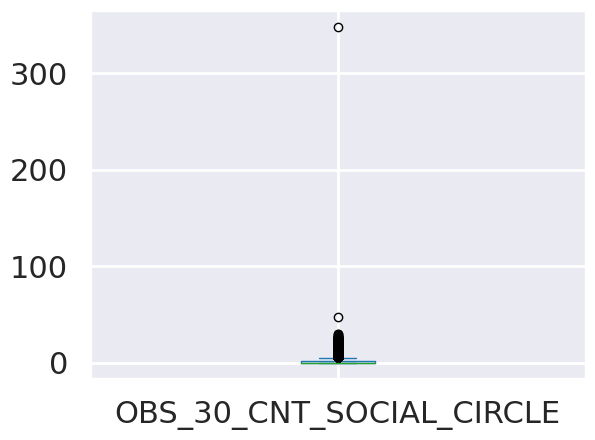

In [ ]:
df_app.OBS_30_CNT_SOCIAL_CIRCLE.plot.box()


In [ ]:
df_app[df_app.OBS_30_CNT_SOCIAL_CIRCLE>=60]


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
148403      272071       0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
148403               Y             0          202500.0    180000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
148403       9000.0         180000.0          Family    State servant   

       NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
148403    Higher education  Single / not married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
148403                    0.020246       10111         1917.0   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
148403             2306.0             2306           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
148403                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
148403      Core staff              1.0                     3   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
148403                            3                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
148403                        9                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
148403                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
148403                       0                       1   

        LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  \
148403                        1            Police                     348.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
148403                      34.0                     344.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
148403                      24.0                  -667.0                0   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
148403                0                0                0                0   

        FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
148403                0                0                0                 0   

        FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
148403                 0                 0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
148403                        0.0                         1.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
148403                        1.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  
148403                         3.0

In [ ]:
df_app=df_app[df_app.OBS_30_CNT_SOCIAL_CIRCLE<47]


In [ ]:
df_app.shape


(307504, 71)

<Axes: >

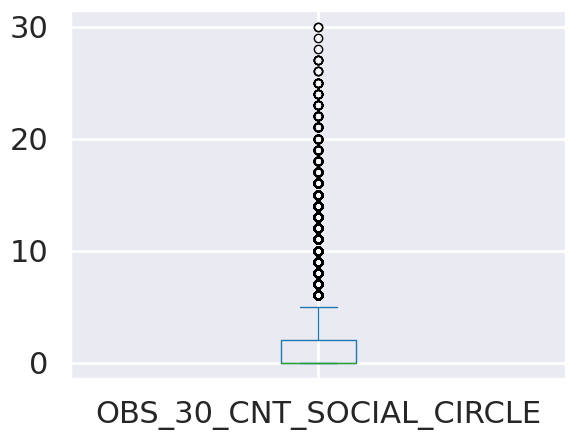

In [ ]:
df_app.OBS_30_CNT_SOCIAL_CIRCLE.plot.box()
#checking the column for outliers

In [ ]:
df_app.OBS_30_CNT_SOCIAL_CIRCLE.describe()


count    307504.000000
mean          1.416216
std           2.314019
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
df_app.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()


1021

In [ ]:
#droping the null values

In [ ]:
df_app.dropna(subset=['DEF_30_CNT_SOCIAL_CIRCLE'], inplace=True)

In [ ]:
df_app.shape


(306483, 71)

In [ ]:
df_app.DEF_30_CNT_SOCIAL_CIRCLE.describe()


count    306483.000000
mean          0.143297
std           0.442440
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: >

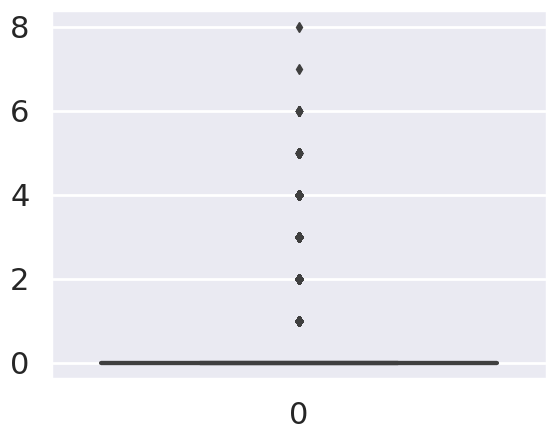

In [ ]:
sns.boxplot(df_app.DEF_30_CNT_SOCIAL_CIRCLE)


In [ ]:
df_app.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()


0

In [ ]:
df_app.OBS_60_CNT_SOCIAL_CIRCLE.describe()


count    306483.000000
mean          1.403993
std           2.296407
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: >

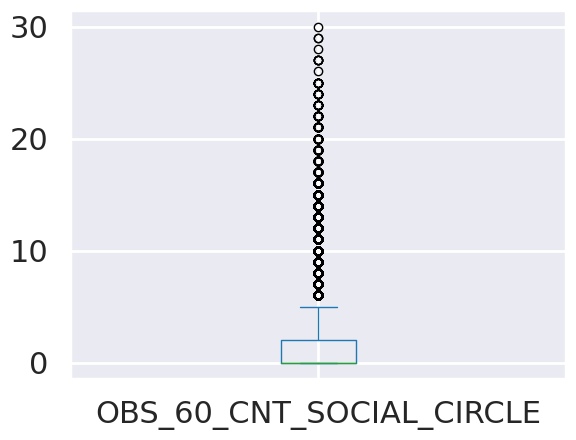

In [ ]:
df_app.OBS_60_CNT_SOCIAL_CIRCLE.plot.box()


In [ ]:
df_app.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()


0

In [ ]:
df_app.DEF_60_CNT_SOCIAL_CIRCLE.describe()


count    306483.000000
mean          0.099957
std           0.359641
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: >

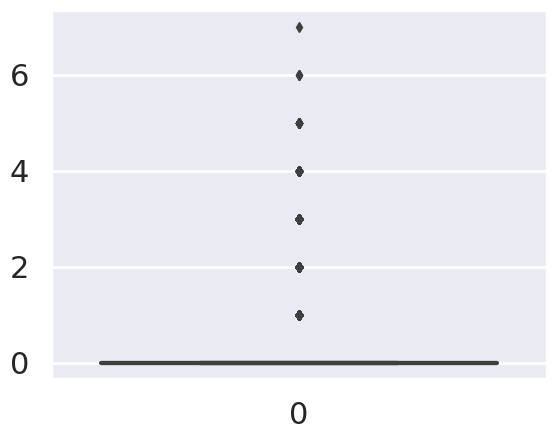

In [ ]:
sns.boxplot(df_app.DEF_60_CNT_SOCIAL_CIRCLE)


In [ ]:
df_app[df_app.DAYS_LAST_PHONE_CHANGE.isnull()]


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
15709      118330       0         Cash loans           M            Y   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
15709               Y             0          126000.0    278613.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
15709      25911.0         252000.0   Unaccompanied          Working   

      NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
15709   Incomplete higher            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
15709                    0.010643        8574          293.0   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
15709             4790.0             1075           0               1   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
15709                0                 1           0           0   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
15709         Unknown              2.0                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
15709                            2                     FRIDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
15709                       13                           0   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
15709                           0                            0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
15709                       0                       0   

       LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  \
15709                        0     Trade: type 3                       0.0   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
15709                       0.0                       0.0   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
15709                       0.0                     NaN                0   

       FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
15709                0                0                0                0   

       FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
15709                0                1                0                 0   

       FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
15709                 0                 0                 0                 0   

       FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
15709                 0                 0                 0                 1   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
15709                 0                 0                 0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
15709                         NaN                        NaN   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
15709                         NaN                        NaN   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
15709                        NaN                         NaN

In [ ]:
df_app.shape


(306483, 71)

In [ ]:
df_app=df_app.drop(15709)


In [ ]:
df_app.shape


(306482, 71)

In [ ]:
df_app.DAYS_LAST_PHONE_CHANGE.describe()


count    306482.000000
mean       -963.471470
std         826.992961
min       -4292.000000
25%       -1570.000000
50%        -758.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [ ]:
df_app.DAYS_LAST_PHONE_CHANGE=abs(df_app.DAYS_LAST_PHONE_CHANGE)


In [ ]:
df_app.DAYS_LAST_PHONE_CHANGE.describe()


count    306482.000000
mean        963.471470
std         826.992961
min           0.000000
25%         274.000000
50%         758.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

<Axes: >

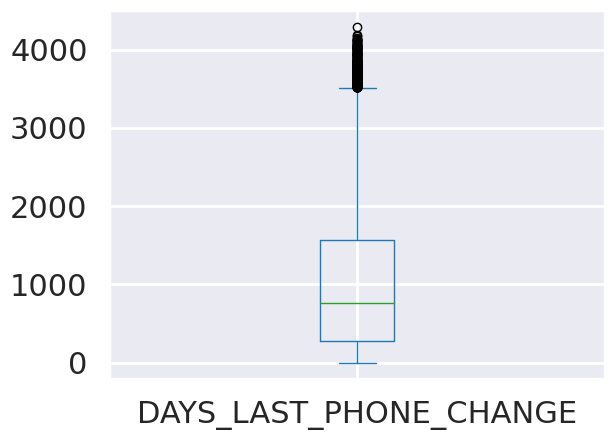

In [ ]:
df_app.DAYS_LAST_PHONE_CHANGE.plot.box()



In [ ]:
#droping unwanted column

In [ ]:
flag = df_app[[ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','TARGET']]

<Axes: >

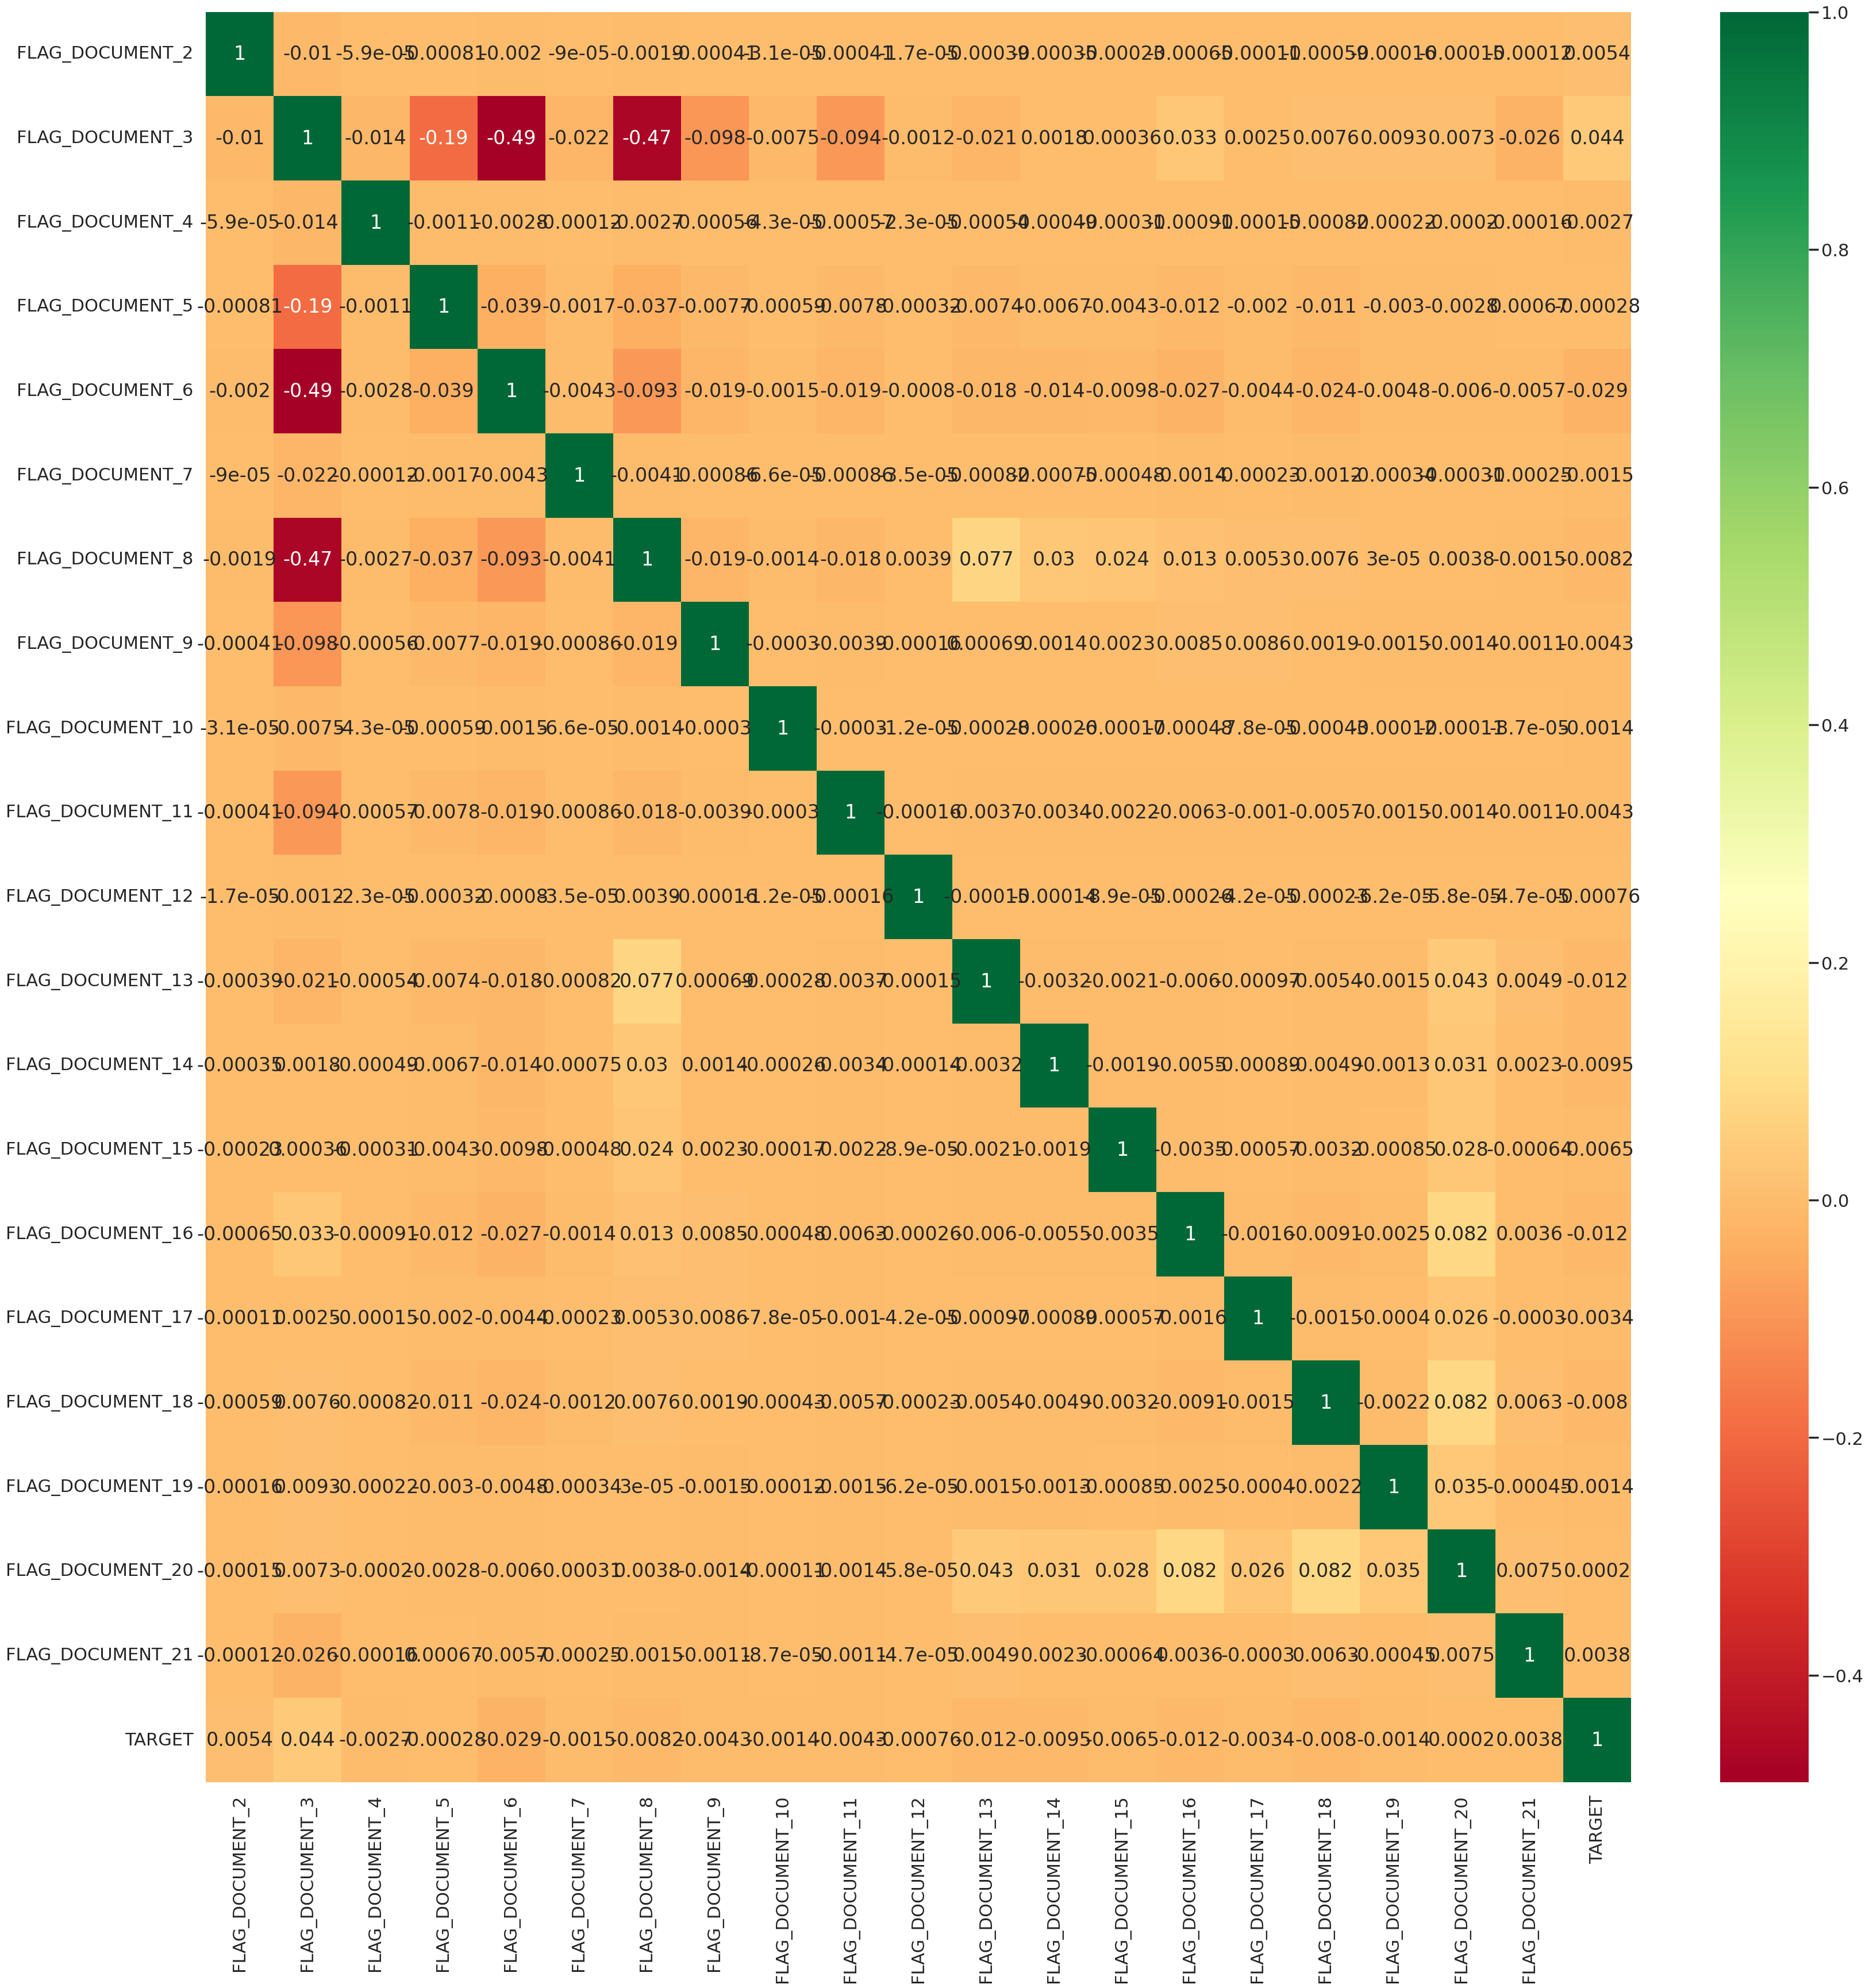

In [ ]:
fig = plt.figure(figsize=(40,40))
flag_corr=flag.corr()
sns.heatmap(flag_corr,
            xticklabels=flag_corr.columns,
            yticklabels=flag_corr.columns,
            annot = True,
            cmap ="RdYlGn")

In [ ]:
df_app.iloc[:, 45:65].columns

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [ ]:
df_app.drop(df_app.iloc[:, 45:65], inplace=True, axis=1)


In [ ]:
df_app.shape


(306482, 51)

In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()


41348

In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_HOUR=df_app.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df_app.AMT_REQ_CREDIT_BUREAU_HOUR.median())


In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()


0

In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_HOUR.describe()


count    306482.000000
mean          0.005527
std           0.077958
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

<Axes: >

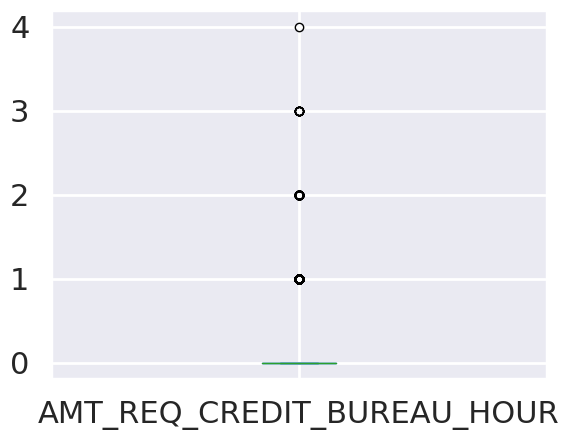

In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_HOUR.plot.box()


In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()


41348

In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_DAY=df_app.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df_app.AMT_REQ_CREDIT_BUREAU_DAY.median())


In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()


0

In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_DAY.describe()


count    306482.000000
mean          0.006072
std           0.103194
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

<Axes: >

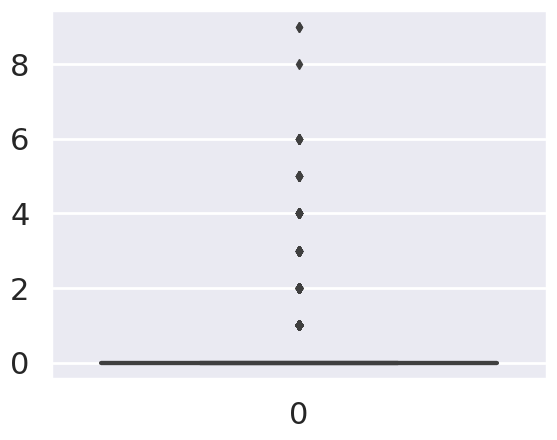

In [ ]:
sns.boxplot(df_app.AMT_REQ_CREDIT_BUREAU_DAY)


In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()


41348

In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_WEEK=df_app.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df_app.AMT_REQ_CREDIT_BUREAU_WEEK.median())


In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()


0

In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_WEEK.describe()


count    306482.000000
mean          0.029767
std           0.190852
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

<Axes: >

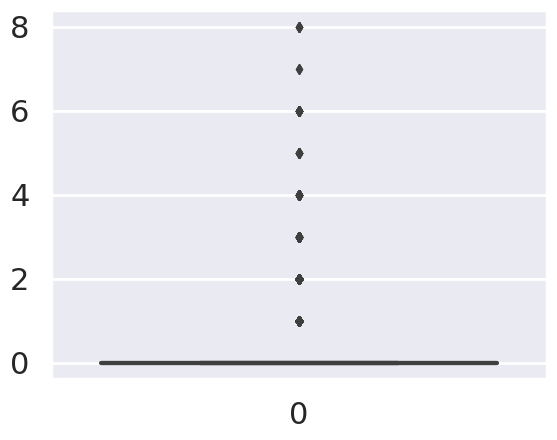

In [ ]:
sns.boxplot(df_app.AMT_REQ_CREDIT_BUREAU_WEEK)


In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()


41348

In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_MON=df_app.AMT_REQ_CREDIT_BUREAU_MON.fillna(df_app.AMT_REQ_CREDIT_BUREAU_MON.median())


In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()


0

In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_MON.describe()


count    306482.000000
mean          0.231341
std           0.856445
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

<Axes: >

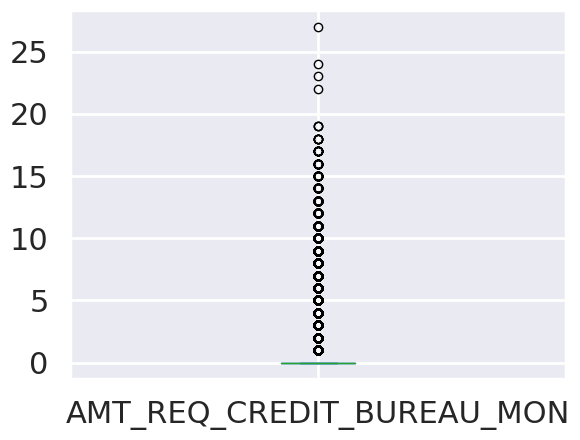

In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_MON.plot.box()


In [ ]:
df_app=df_app[df_app.AMT_REQ_CREDIT_BUREAU_MON<20]


In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()


41348

In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_QRT=df_app.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df_app.AMT_REQ_CREDIT_BUREAU_QRT.median())


In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_QRT.describe()


count    306478.000000
mean          0.229804
std           0.744554
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

<Axes: >

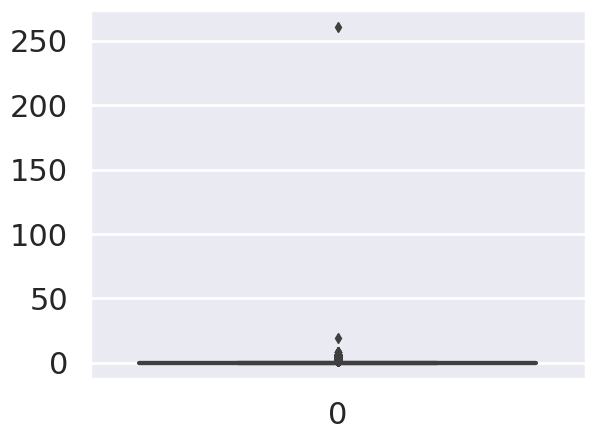

In [ ]:
sns.boxplot(df_app.AMT_REQ_CREDIT_BUREAU_QRT)


In [ ]:
df_app[df_app.AMT_REQ_CREDIT_BUREAU_QRT>50]


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
239474      377322       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
239474               Y             1          360000.0   1035000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
239474      30393.0        1035000.0   Unaccompanied          Working   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
239474    Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
239474                    0.026392       13590         3336.0   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
239474             3629.0             3267           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
239474                0                 1           1           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
239474     Accountants              3.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
239474                            2                     MONDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
239474                       19                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
239474                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
239474                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
239474                        0  Business Entity Type 2   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
239474                       3.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
239474                       3.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
239474                   695.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
239474                        0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
239474                        1.0                      261.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  
239474                         0.0

In [ ]:
df_app=df_app[df_app.AMT_REQ_CREDIT_BUREAU_QRT<50]


In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()


41348

In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_YEAR=df_app.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df_app.AMT_REQ_CREDIT_BUREAU_YEAR.median())


In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_YEAR.describe()


count    306477.000000
mean          1.779439
std           1.765418
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

<Axes: >

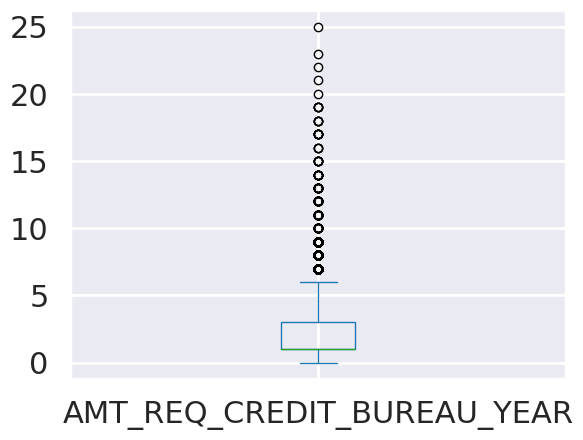

In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_YEAR.plot.box()


In [ ]:
# final check

In [ ]:
contact = df_app[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','TARGET']]

<Axes: >

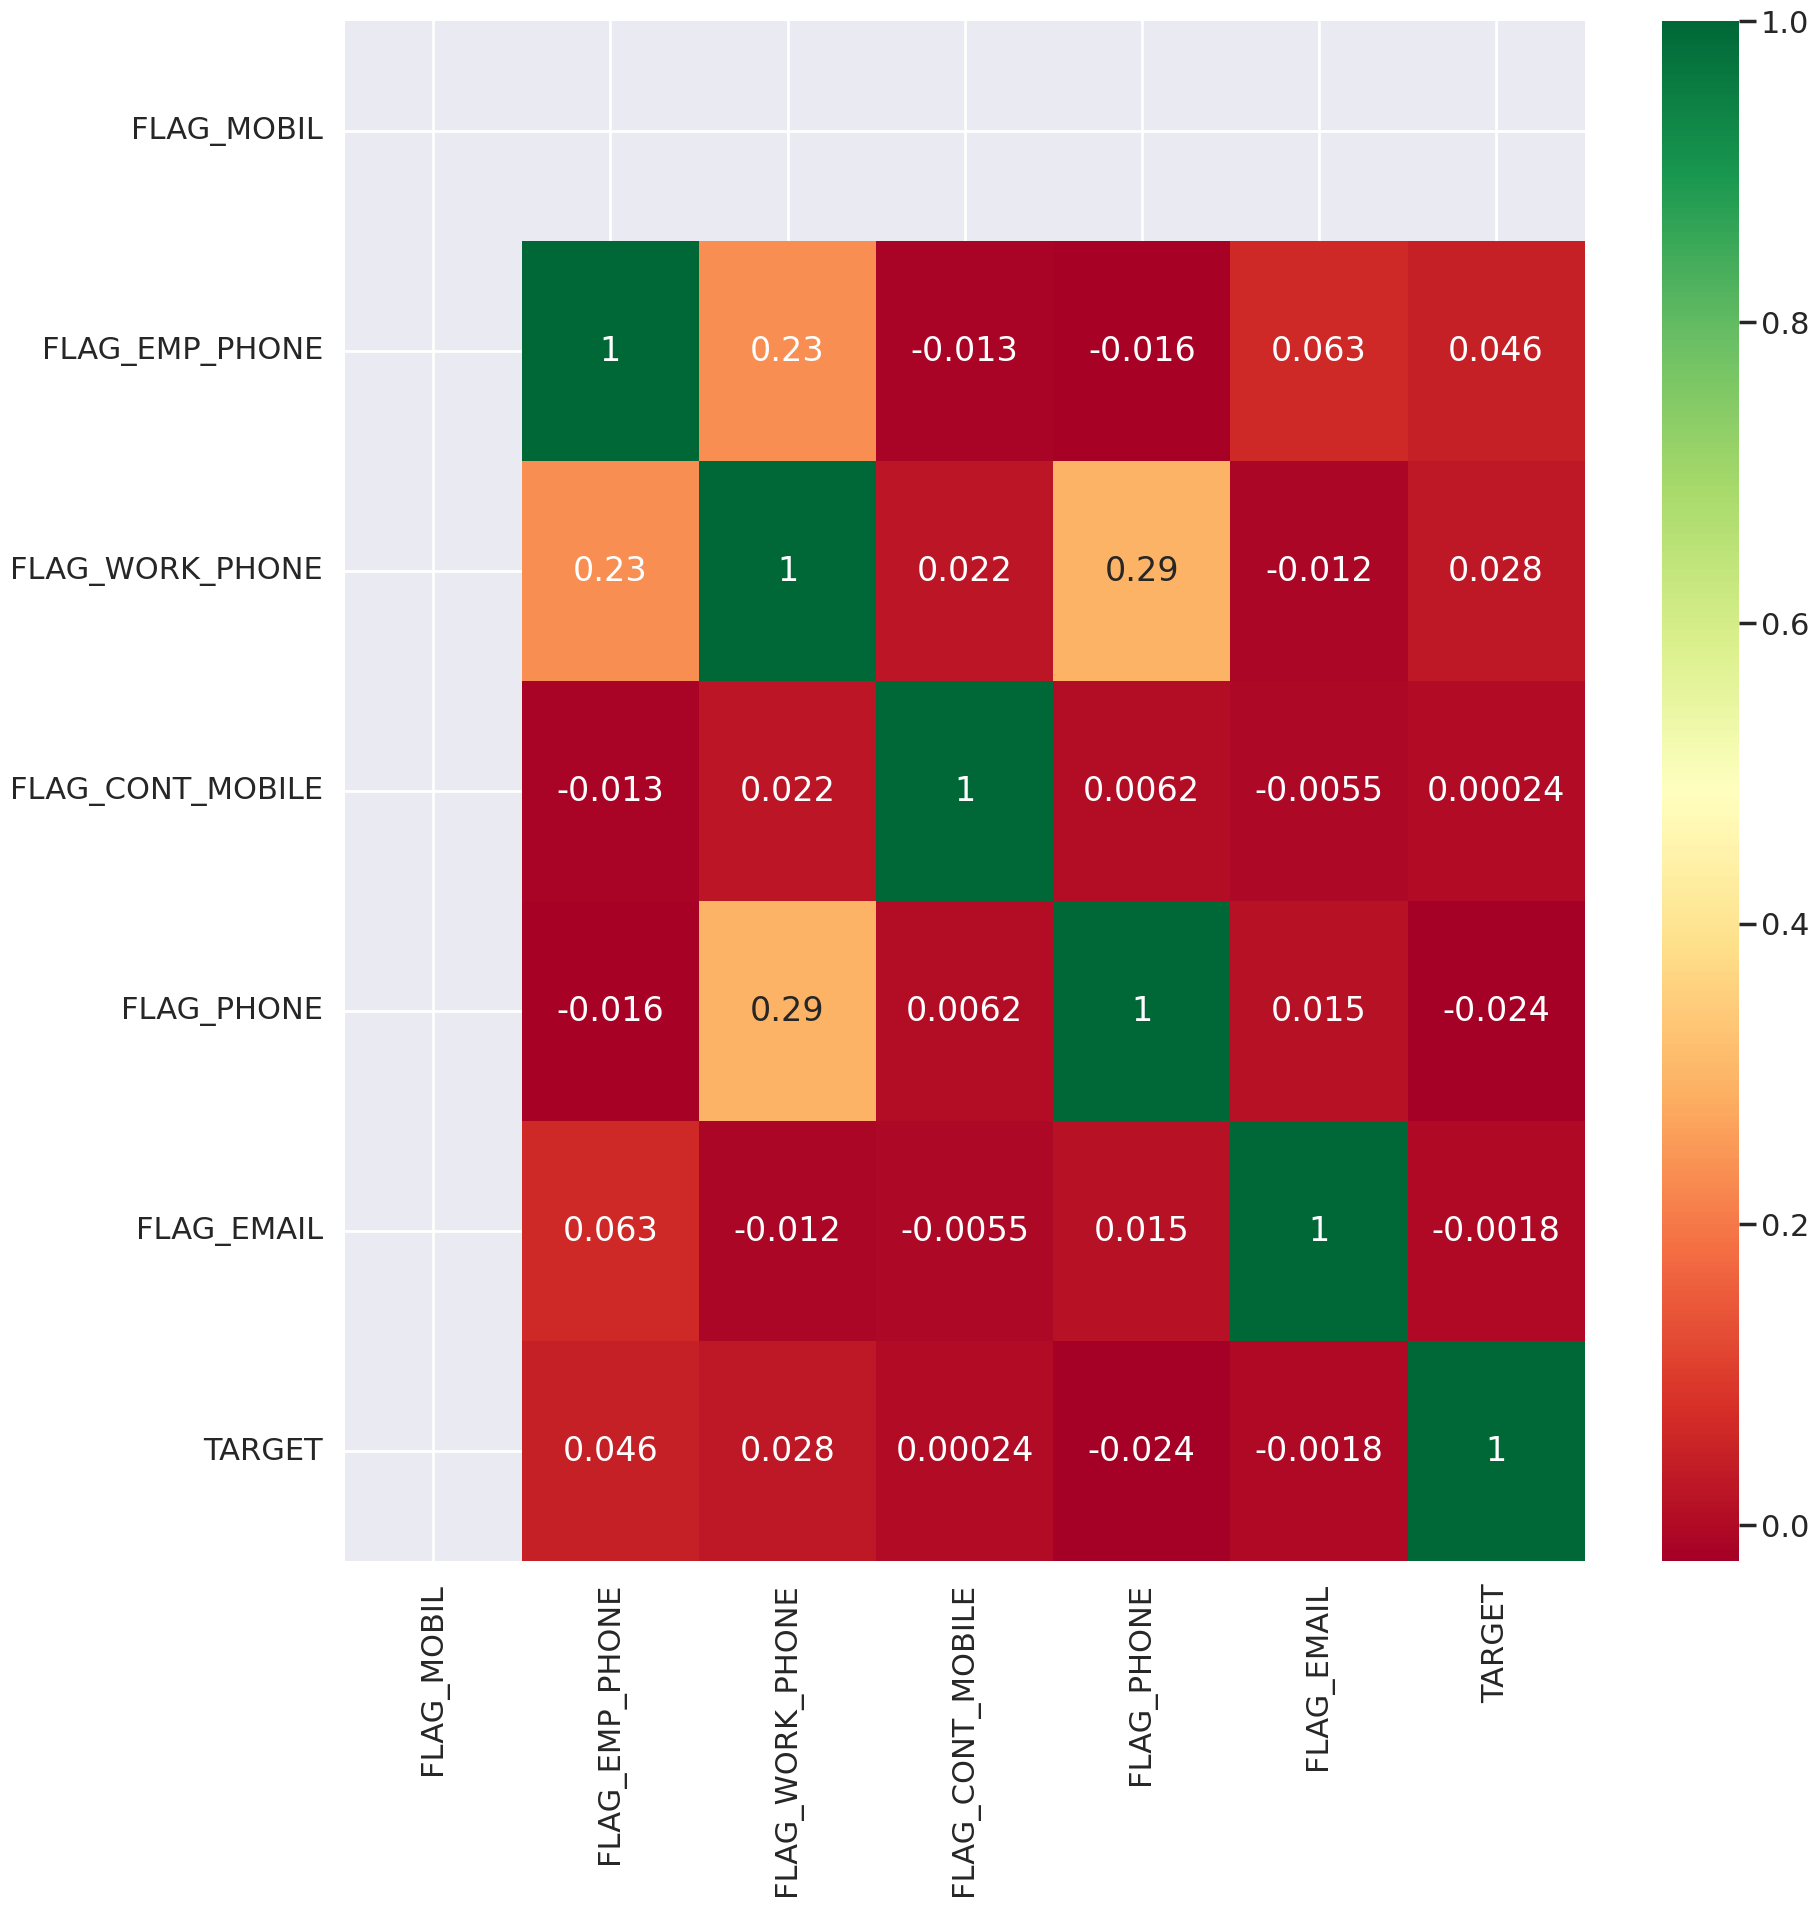

In [ ]:
fig = plt.figure(figsize=(20,20))
contact_corr=contact.corr()
sns.heatmap(contact_corr,
            xticklabels=contact_corr.columns,
            yticklabels=contact_corr.columns,
            annot = True,
            cmap ="RdYlGn")

In [ ]:
#there is no corelation between flags of mobile phone,emailetc with loan repayment,thus these columns can be deleted

In [ ]:
df_app.iloc[:,23:27].columns

Index(['FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'], dtype='object')

In [ ]:
df_app.drop(df_app.iloc[:, 23:27], inplace=True, axis=1)


In [ ]:
df_app.shape


(306477, 47)

In [ ]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306477 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   306477 non-null  int64  
 1   TARGET                       306477 non-null  int64  
 2   NAME_CONTRACT_TYPE           306477 non-null  object 
 3   CODE_GENDER                  306477 non-null  object 
 4   FLAG_OWN_CAR                 306477 non-null  object 
 5   FLAG_OWN_REALTY              306477 non-null  object 
 6   CNT_CHILDREN                 306477 non-null  int64  
 7   AMT_INCOME_TOTAL             306477 non-null  float64
 8   AMT_CREDIT                   306477 non-null  float64
 9   AMT_ANNUITY                  306477 non-null  float64
 10  AMT_GOODS_PRICE              306477 non-null  float64
 11  NAME_TYPE_SUITE              306477 non-null  object 
 12  NAME_INCOME_TYPE             306477 non-null  object 
 13 

In [ ]:
df_prev.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [ ]:
null = (df_prev.isnull().sum()/len(df_prev)*100).sort_values(ascending = False).head(50)
null.head(30)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [ ]:
# filling the null values with the median

In [ ]:
df_prev.AMT_GOODS_PRICE.fillna(df_prev.AMT_GOODS_PRICE.median(),inplace = True )
df_prev.AMT_ANNUITY.fillna(df_prev.AMT_ANNUITY.mode()[0],inplace = True)

df_prev.CNT_PAYMENT.fillna(df_prev.CNT_PAYMENT.mode()[0],inplace = True)

In [ ]:
(df_prev.isnull().sum()/len(df_prev)*100).sort_values(ascending=False)


PRODUCT_COMBINATION            0.020716
AMT_CREDIT                     0.000060
NAME_PAYMENT_TYPE              0.000000
NAME_YIELD_GROUP               0.000000
CNT_PAYMENT                    0.000000
NAME_SELLER_INDUSTRY           0.000000
SELLERPLACE_AREA               0.000000
CHANNEL_TYPE                   0.000000
NAME_PRODUCT_TYPE              0.000000
NAME_PORTFOLIO                 0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_CLIENT_TYPE               0.000000
CODE_REJECT_REASON             0.000000
SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_STATUS           0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
AMT_GOODS_PRICE                0.000000
AMT_APPLICATION                0.000000
AMT_ANNUITY                    0.000000
NAME_CONTRACT_TYPE             0.000000


In [ ]:
#removing the columns value 'XNA' and 'XAP'


In [ ]:
df_prev=df_prev.drop(df_prev[df_prev['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_prev=df_prev.drop(df_prev[df_prev['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_prev=df_prev.drop(df_prev[df_prev['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df_prev.shape

(69635, 26)

In [ ]:
df_merge=pd.merge(left=df_app,right=df_prev,how='inner',on='SK_ID_CURR',suffixes='_x')


In [ ]:
df_merge.shape

(59306, 72)

In [ ]:
df_merge = df_merge.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [ ]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Percentage of NAME_CLIENT_TYPE","Percentage of NAME_CONTRACT_STATUS"),
                   specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = df_merge['NAME_CLIENT_TYPE'].value_counts().index.to_list(),
                     values = df_merge['NAME_CLIENT_TYPE'].value_counts().to_list() ,textinfo='label+percent'),1, 1)

fig.add_trace(go.Pie(labels = df_merge['NAME_CONTRACT_STATUS'].value_counts().index.to_list(),
                     values = df_merge['NAME_CONTRACT_STATUS'].value_counts().to_list(), textinfo='label+percent'),1, 2)


fig.update_traces(hole=.4,showlegend=False)      # Use `hole` to create a donut-like pie chart

fig.show()

In [ ]:
df_merge.CHANNEL_TYPE.value_counts()


Credit and cash offices       42080
AP+ (Cash loan)                7195
Country-wide                   4692
Channel of corporate sales     2765
Contact center                 2364
Stone                           113
Regional / Local                 97
Name: CHANNEL_TYPE, dtype: int64

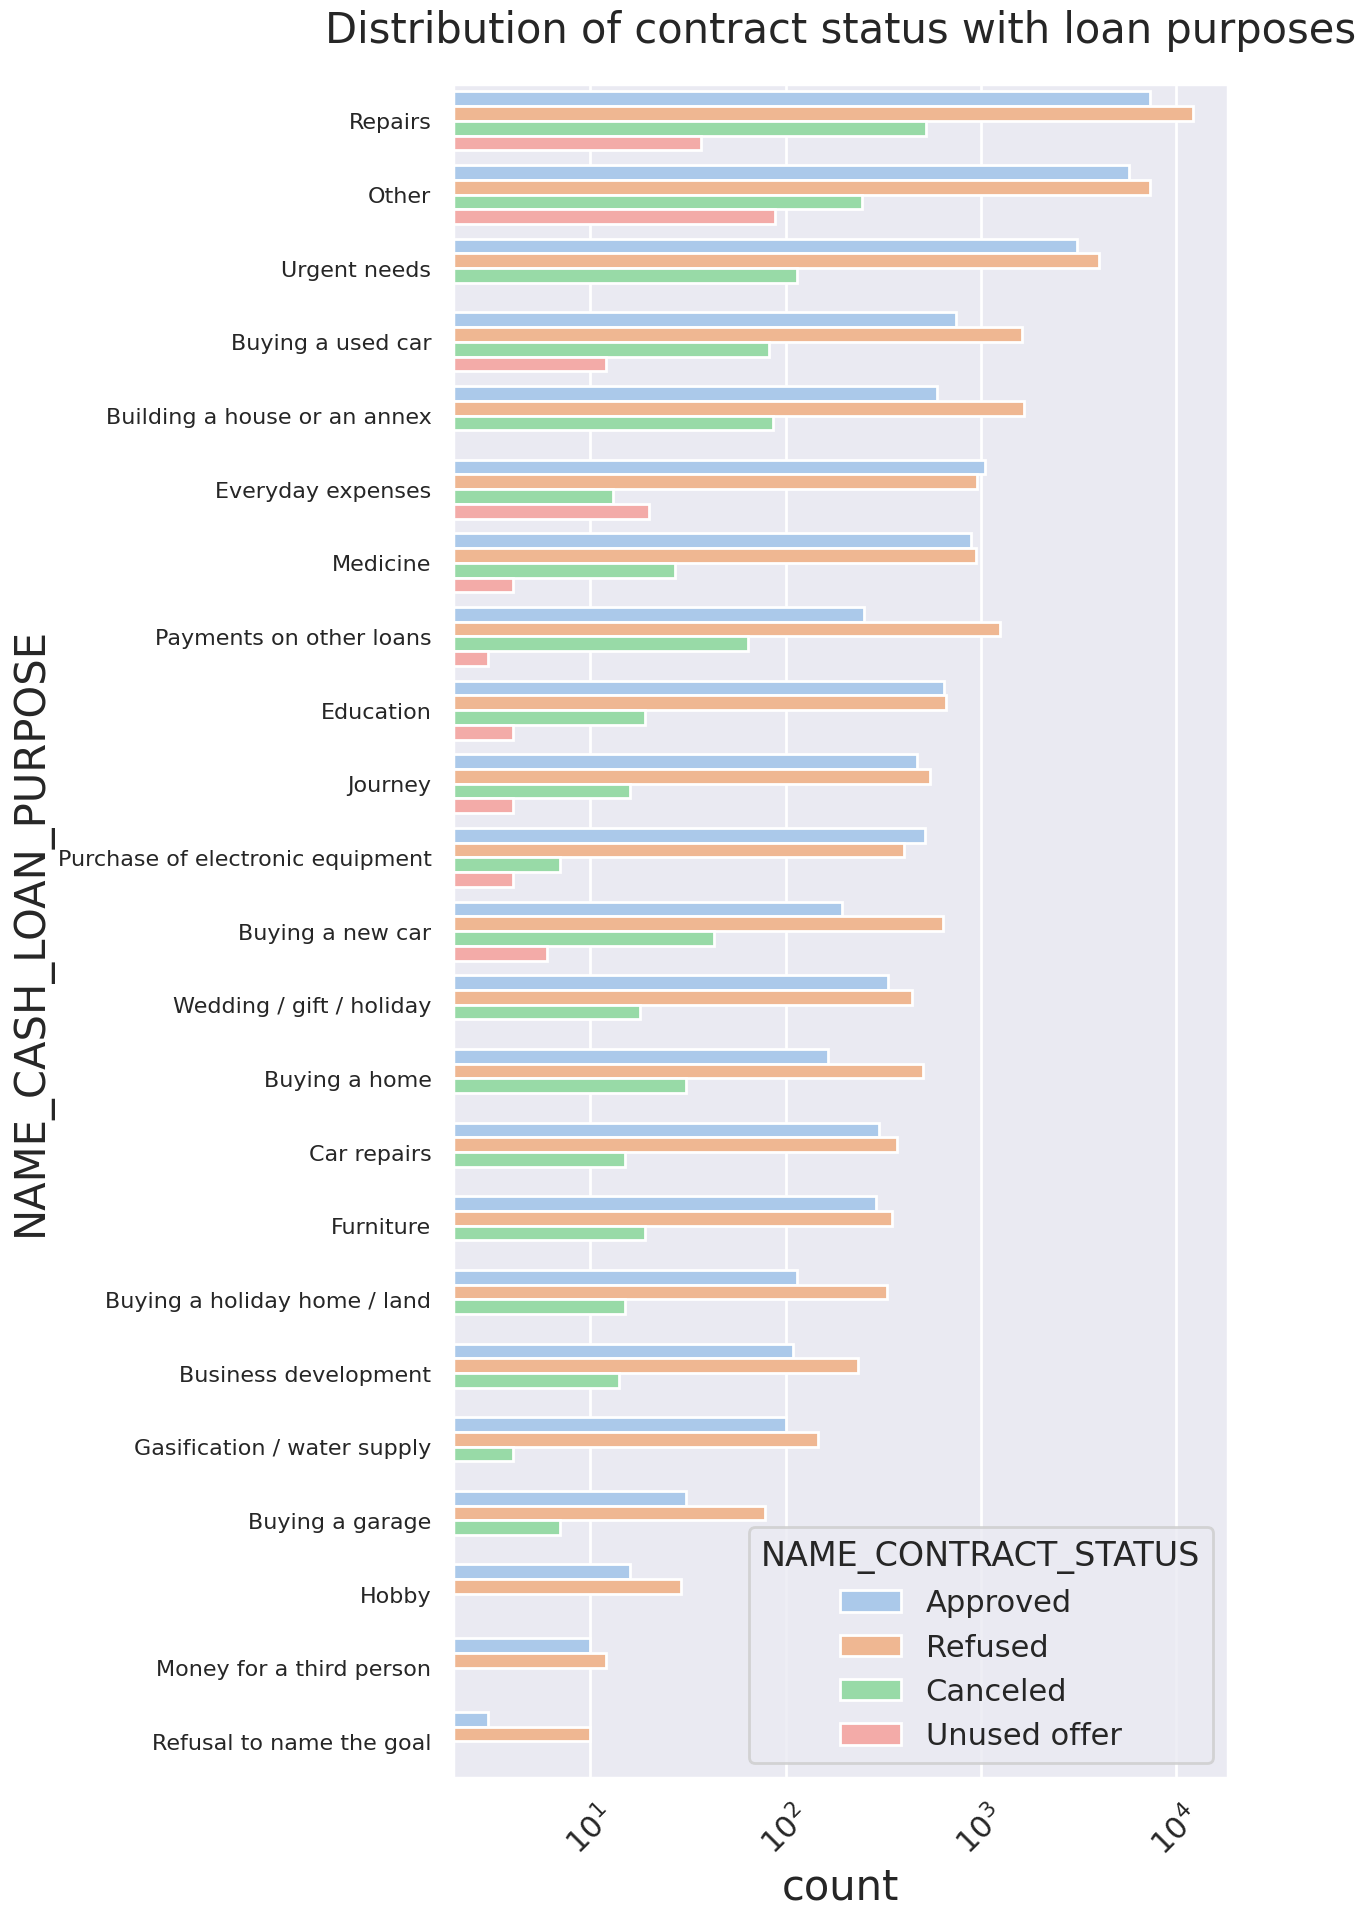

In [ ]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(10,22))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.xscale('log')
plt.title('Distribution of contract status with loan purposes')



ax = sns.countplot(data = df_merge, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=df_merge['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='pastel')

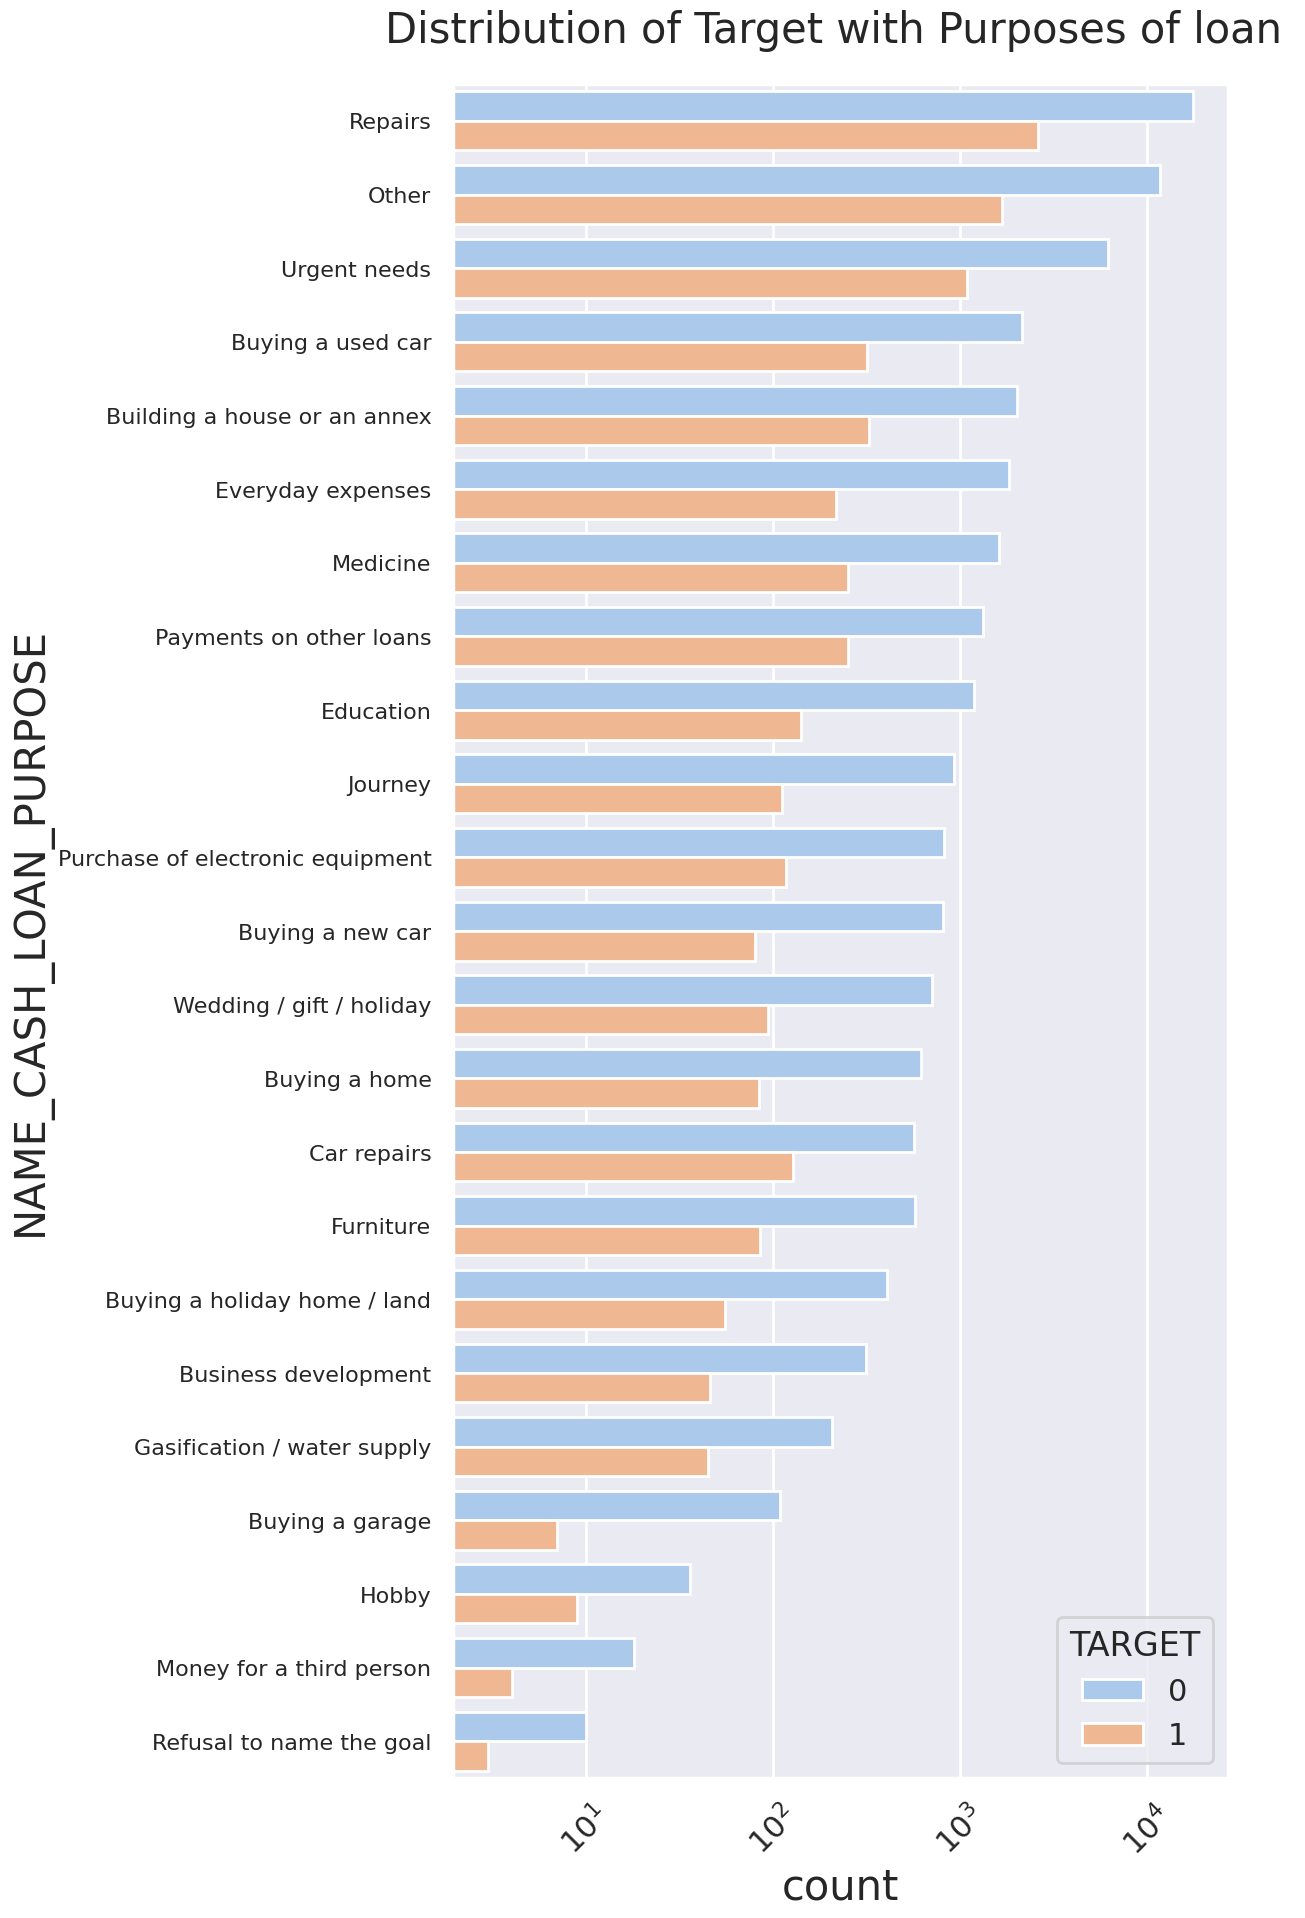

In [ ]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(10,22))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.xscale('log')
plt.title('Distribution of Target with Purposes of loan ')

ax = sns.countplot(data = df_merge, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=df_merge['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='pastel')

In [ ]:
df_merge.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE_', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE

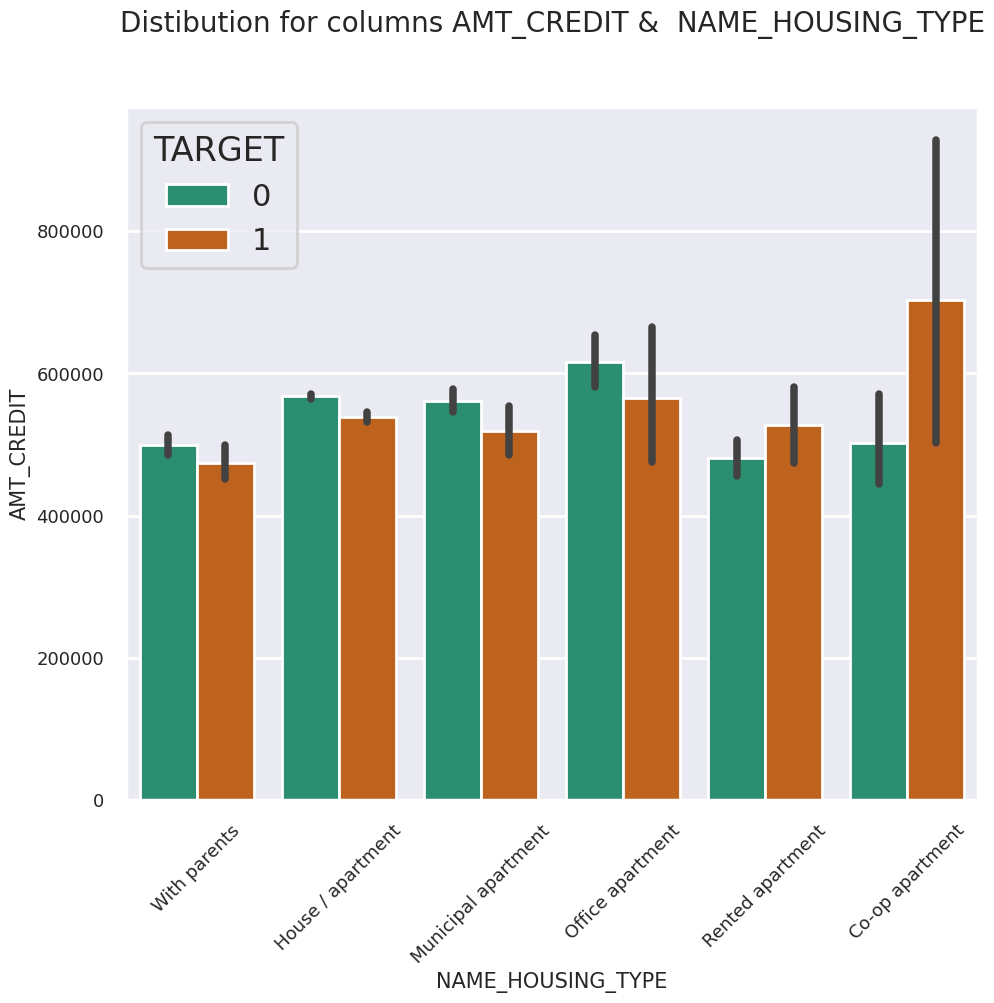

In [ ]:
plt.figure(figsize=(11,9))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 30
sns.barplot(data =df_merge, y='AMT_CREDIT',hue='TARGET',x='NAME_HOUSING_TYPE',palette='Dark2')
plt.title("Distibution for columns AMT_CREDIT &  NAME_HOUSING_TYPE\n")
plt.xticks(fontsize=13,rotation=45)
plt.yticks(fontsize=13, rotation=360)
plt.show()

<Axes: >

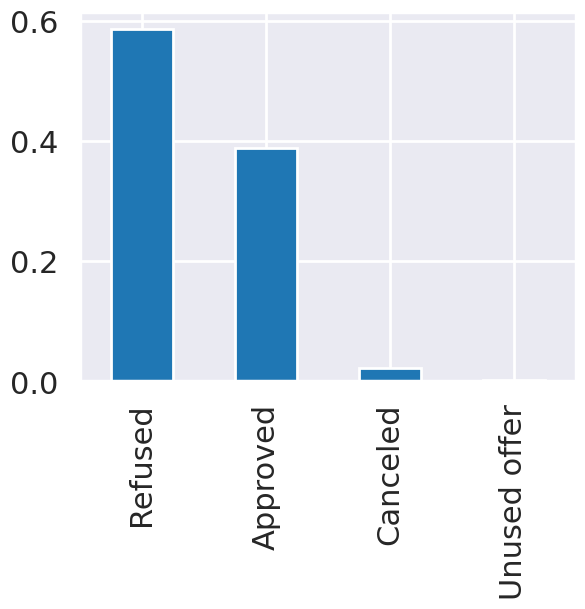

In [ ]:
df_merge.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()


In [ ]:
#educarion vs offer

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

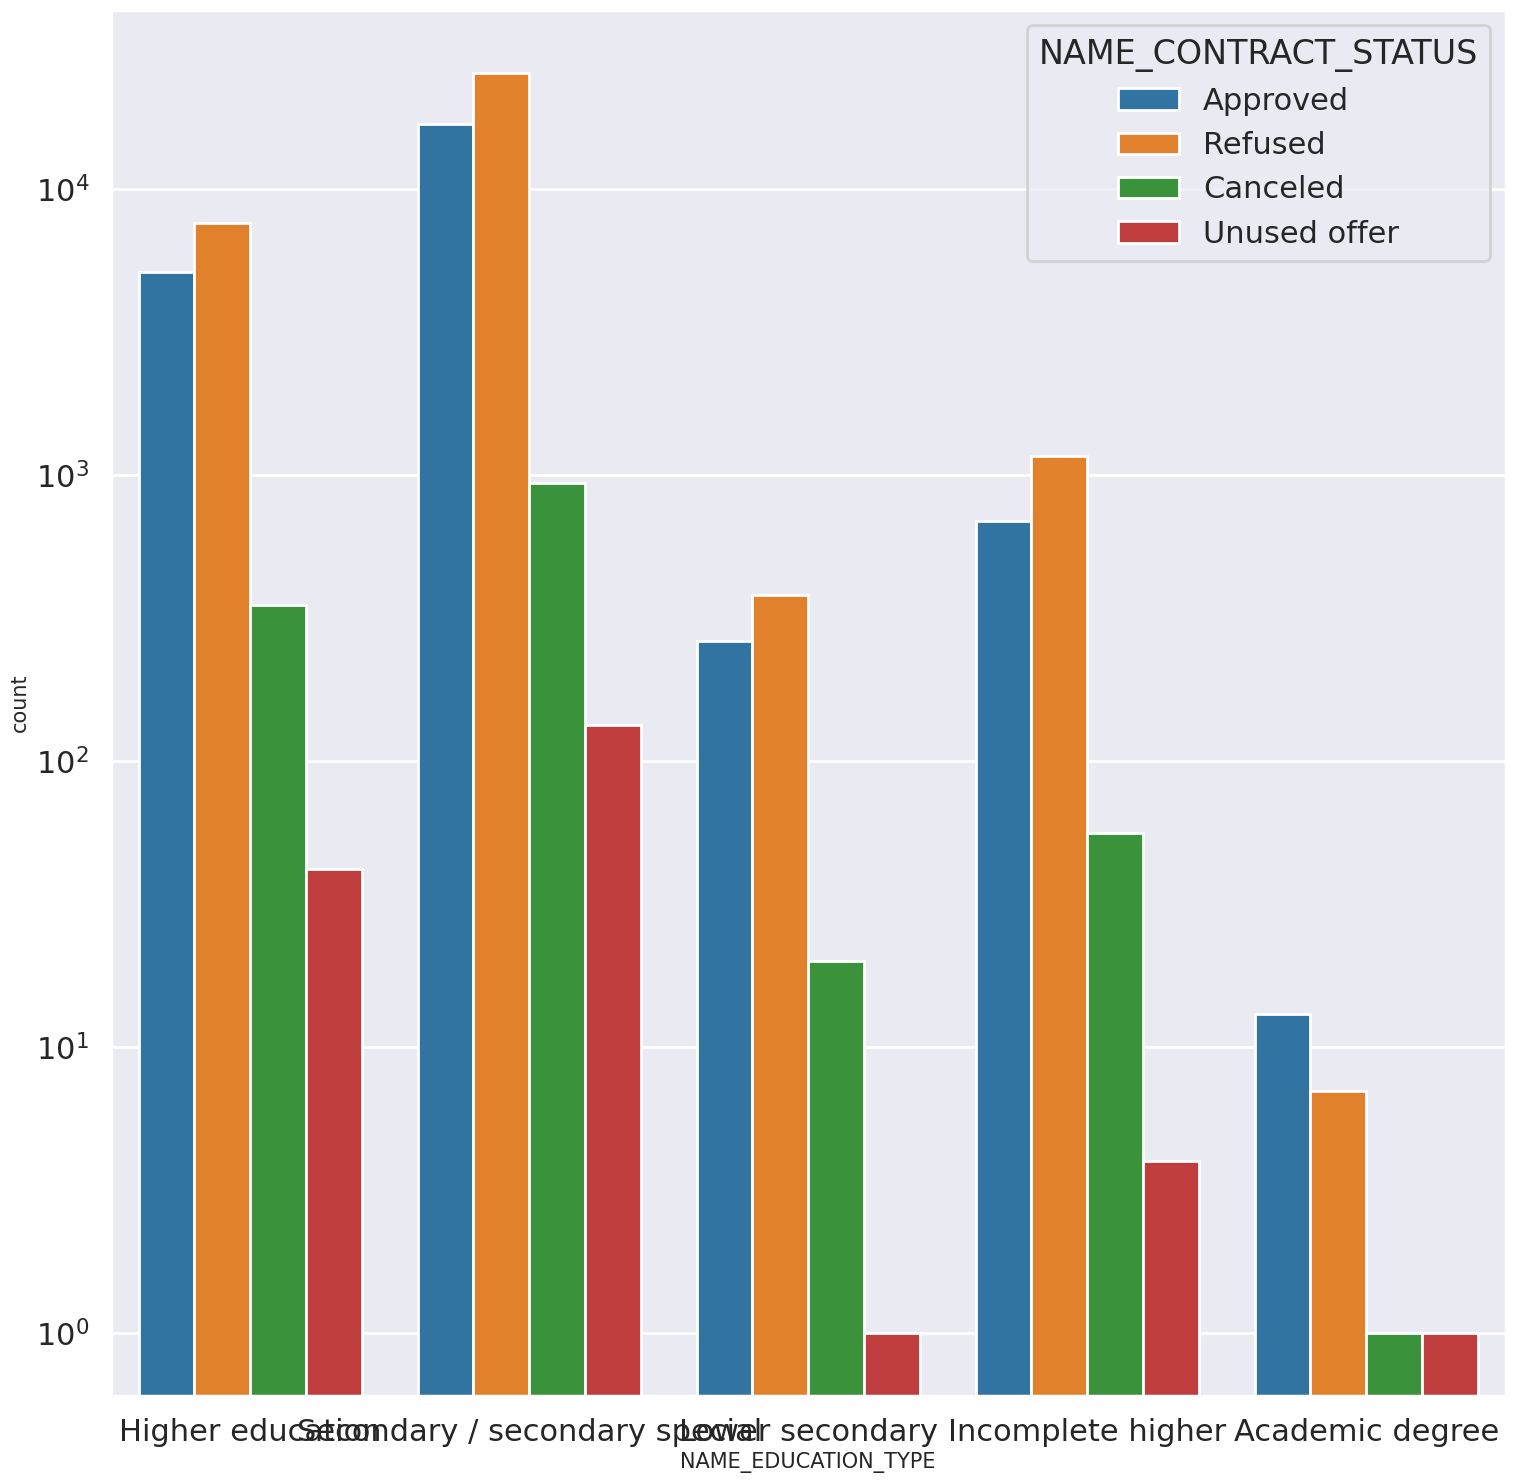

In [ ]:
plt.figure(figsize=(18,18))
plt.yscale('log')
sns.countplot(data=df_merge,x='NAME_EDUCATION_TYPE',hue='NAME_CONTRACT_STATUS')

In [ ]:
#purpose vs offer

<Axes: xlabel='NAME_CASH_LOAN_PURPOSE', ylabel='count'>

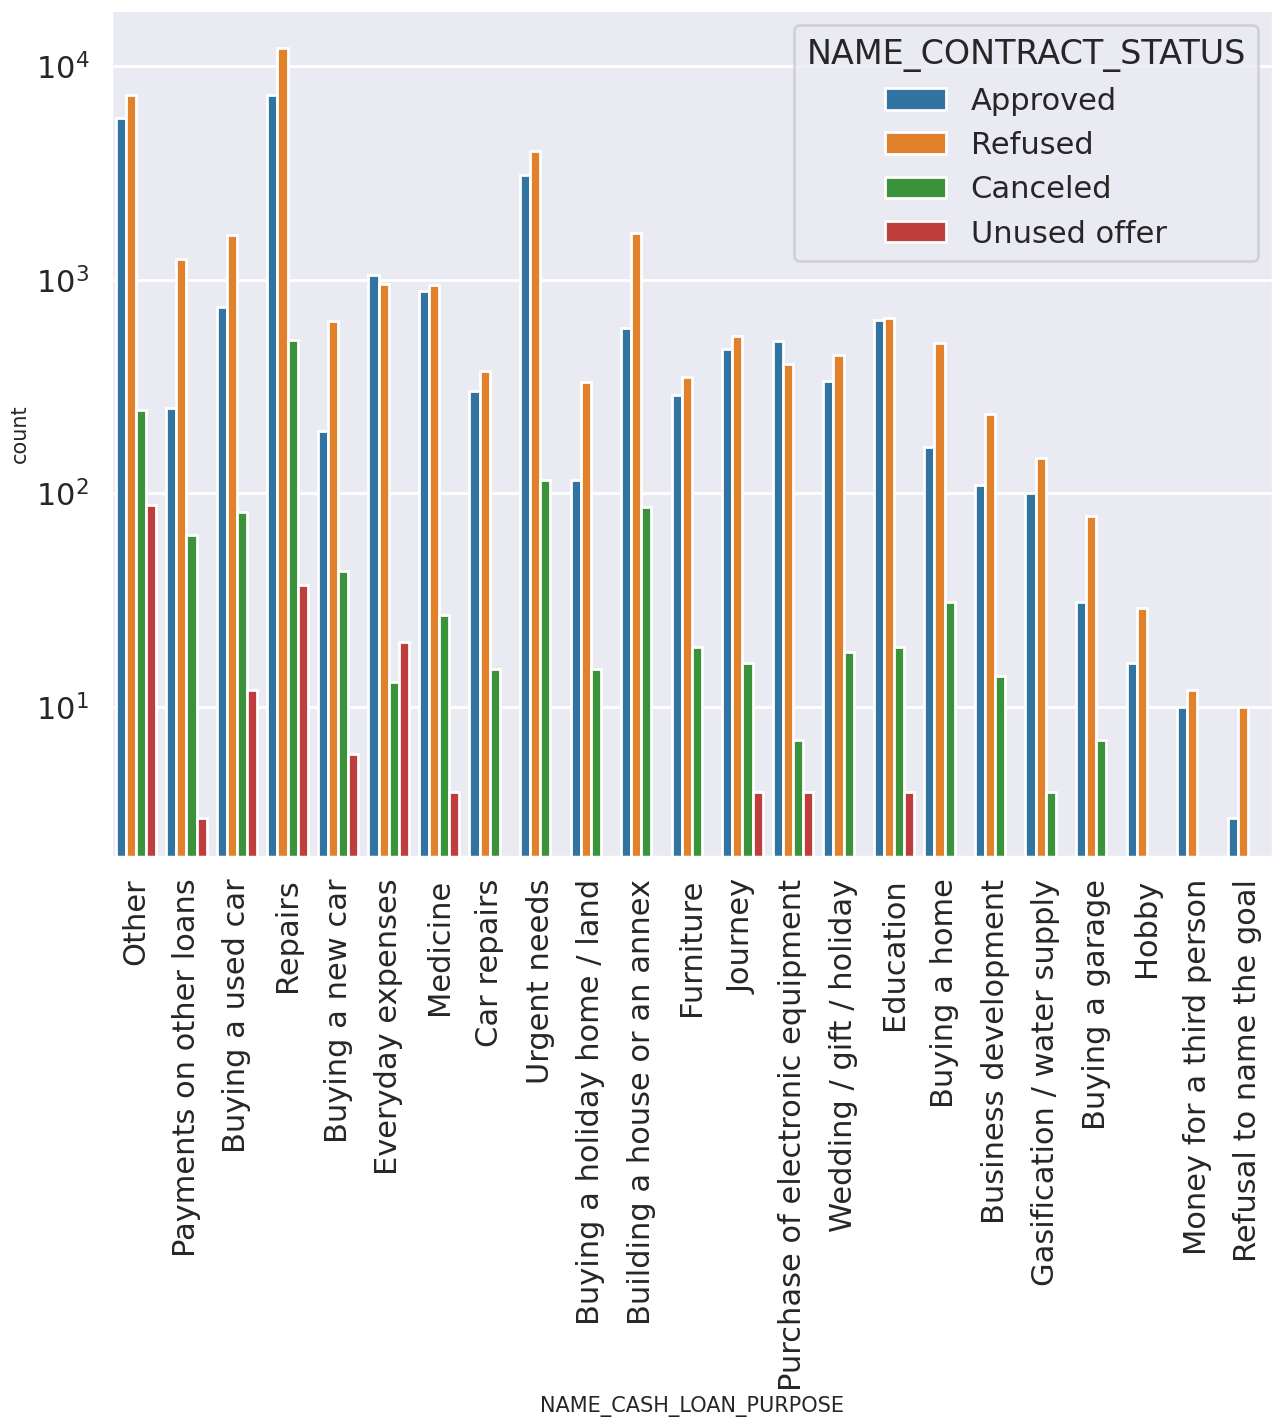

In [ ]:
plt.figure(figsize=(15,11))
plt.xticks(rotation=90)
plt.yscale('log')
sns.countplot(data=df_merge,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')

In [ ]:
#property vs offer

<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='count'>

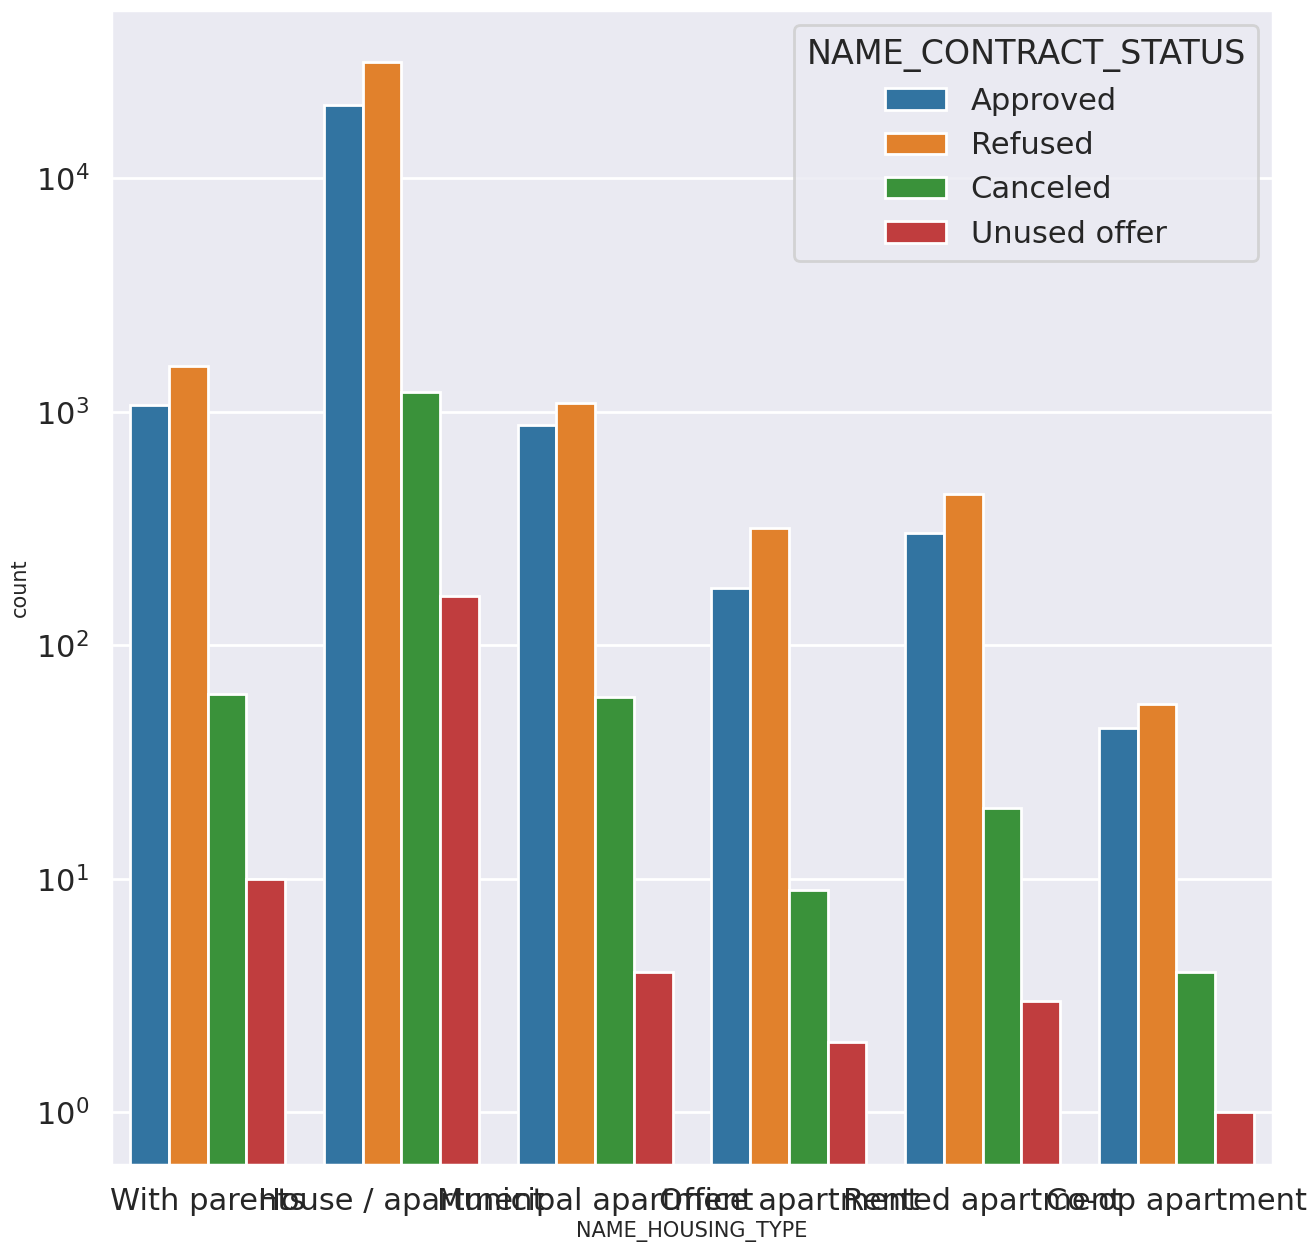

In [ ]:
plt.figure(figsize=(15,15))
plt.yscale('log')
sns.countplot(data=df_merge,x='NAME_HOUSING_TYPE',hue='NAME_CONTRACT_STATUS')

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

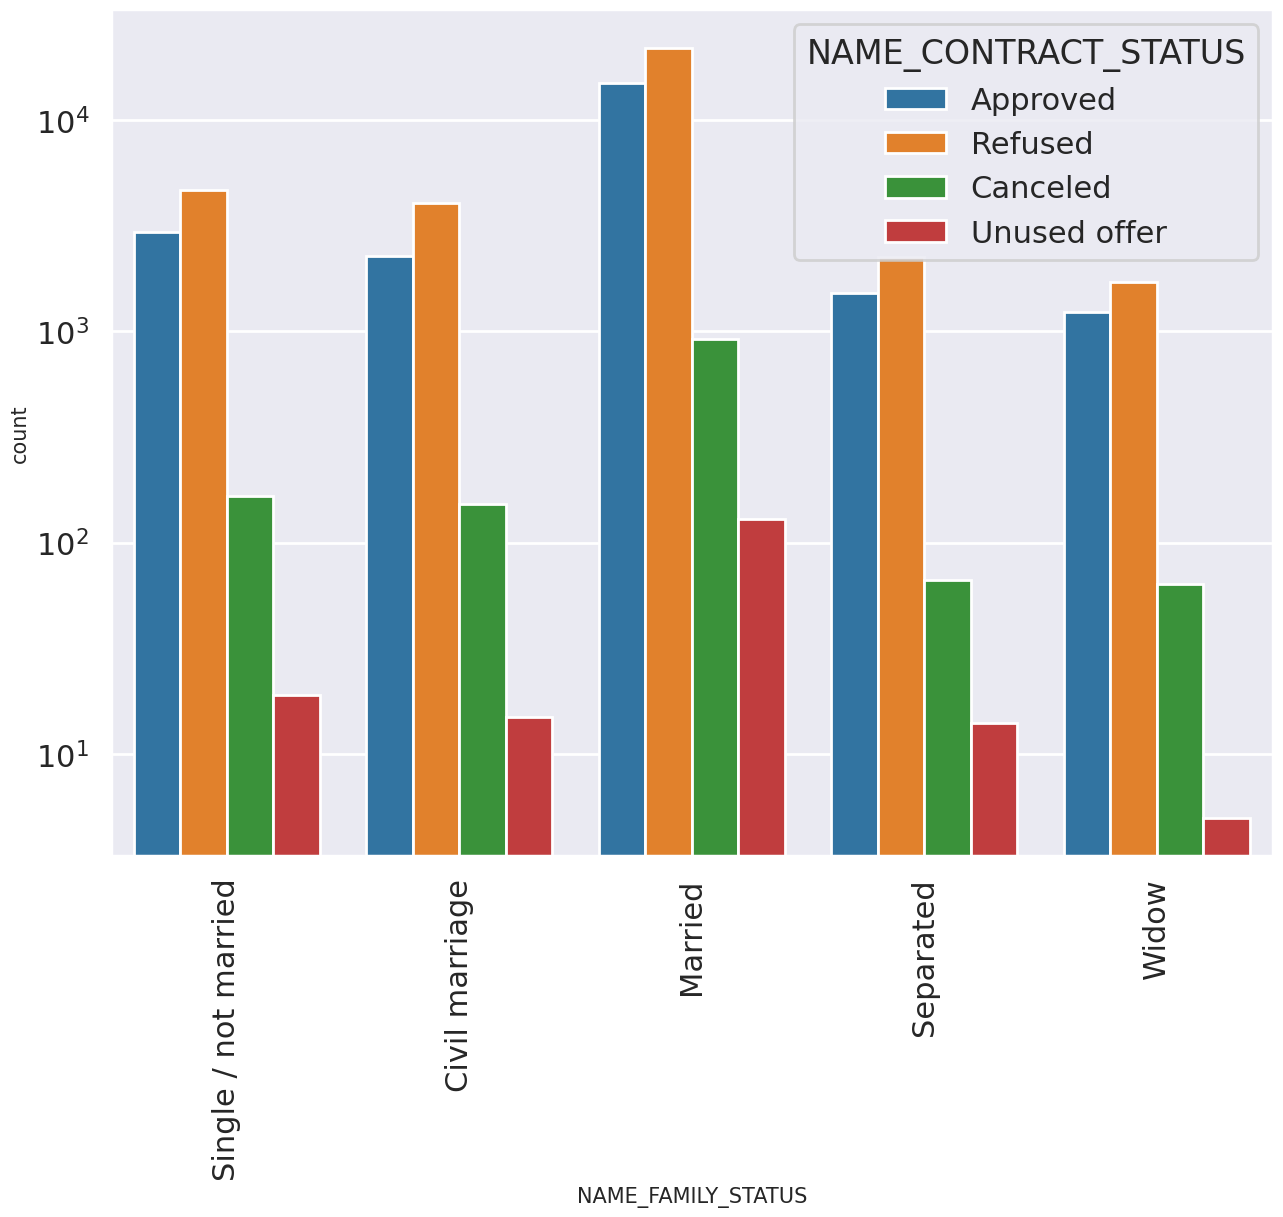

In [ ]:
plt.figure(figsize=(15,11))
plt.xticks(rotation=90)
plt.yscale('log')
sns.countplot(data=df_merge,x='NAME_FAMILY_STATUS',hue='NAME_CONTRACT_STATUS')

<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

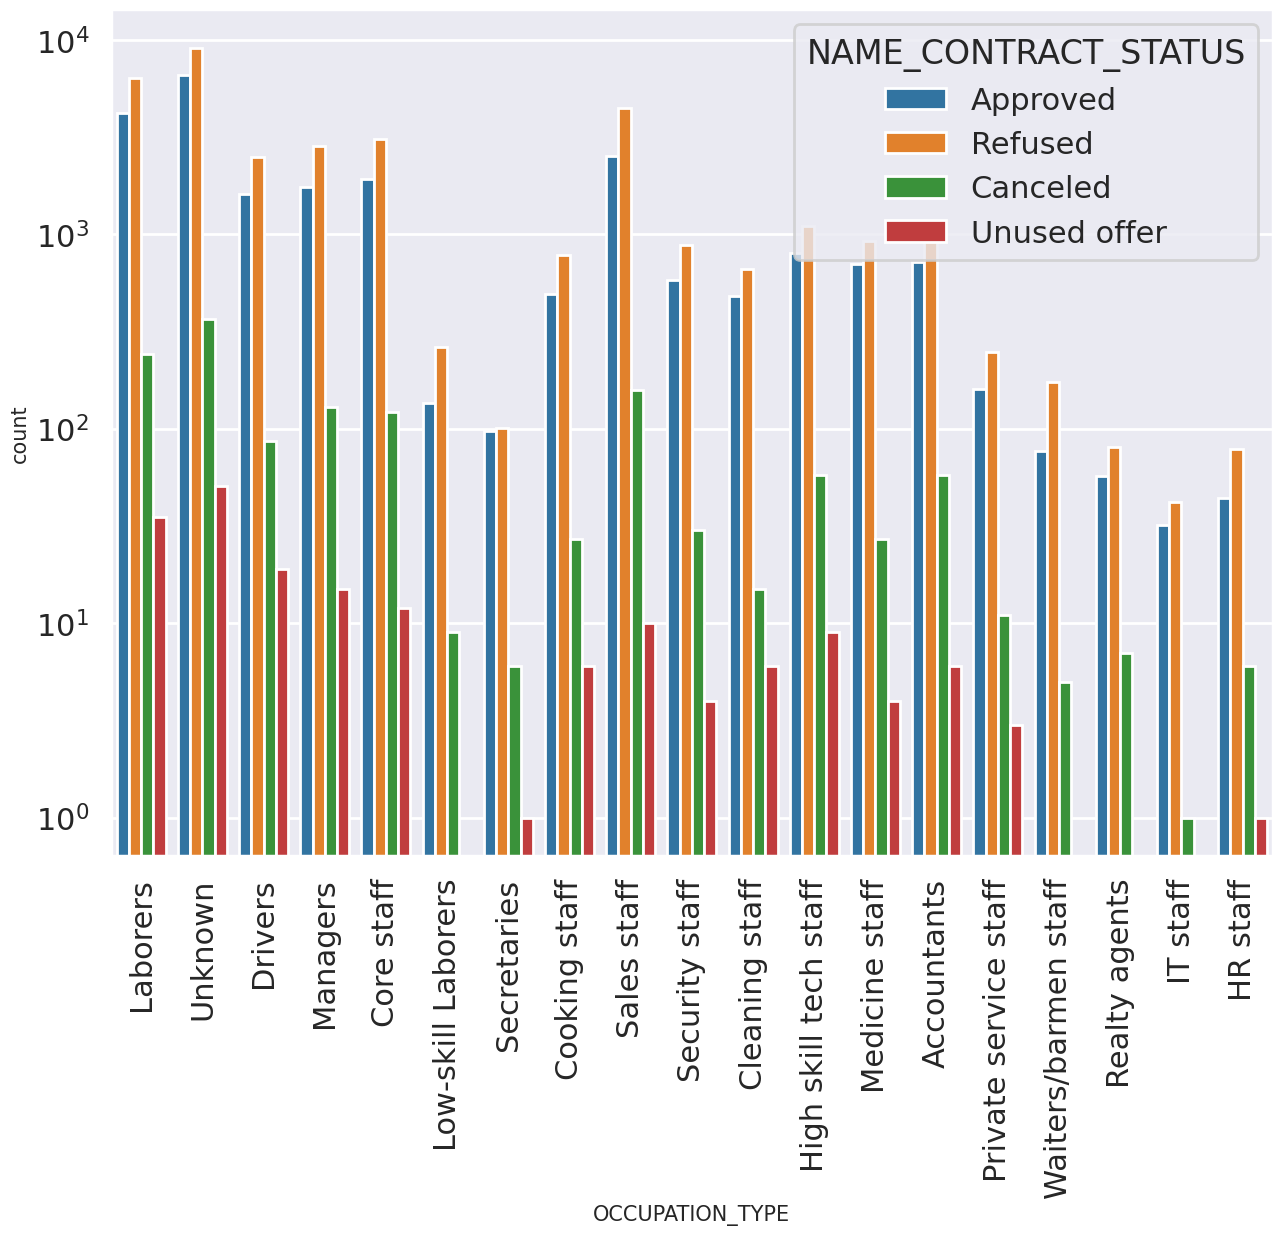

In [ ]:
plt.figure(figsize=(15,11))
plt.xticks(rotation=90)
plt.yscale('log')
sns.countplot(data=df_merge,x='OCCUPATION_TYPE',hue='NAME_CONTRACT_STATUS')


In [ ]:
df_merge.shape

(59306, 72)

In [ ]:
#  ML model

In [ ]:
df_app.shape

(306477, 47)

In [ ]:
df_prev.shape

(69635, 26)

In [ ]:
df_prev.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [ ]:
#ANALYSIS OF COLUMNS FOR ML MODELS

In [ ]:
df_app.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION

In [ ]:
df_merge.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE_                   0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
W

In [ ]:
#multivariate analysis

In [ ]:
df_merge.corr()

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000 -0.004828     -0.004159   
TARGET                         -0.004828  1.000000      0.027057   
CNT_CHILDREN                   -0.004159  0.027057      1.000000   
AMT_INCOME_TOTAL                0.005081 -0.026314      0.009347   
AMT_CREDIT                      0.008141 -0.027113     -0.015634   
AMT_ANNUITY                     0.007030 -0.003952      0.016239   
AMT_GOODS_PRICE_                0.009719 -0.036199     -0.018911   
REGION_POPULATION_RELATIVE      0.003129 -0.057621     -0.018025   
DAYS_BIRTH                      0.010806 -0.062353     -0.353420   
DAYS_EMPLOYED                  -0.003910 -0.065164     -0.060160   
DAYS_REGISTRATION               0.011501 -0.051399     -0.185102   
DAYS_ID_PUBLISH                 0.002714 -0.053355      0.027540   
FLAG_MOBIL                           NaN       NaN           NaN   
FLAG_EMP_PHONE                 -0.003492  0.045052      0.201734   
CNT_FAM_MEMBERS                 0.000610  0.025134      0.881915   
REGION_RATING_CLIENT           -0.007874  0.077979      0.038117   
REGION_RATING_CLIENT_W_CITY    -0.005660  0.082058      0.038625   
HOUR_APPR_PROCESS_START         0.007815 -0.034685     -0.016010   
REG_REGION_NOT_LIVE_REGION     -0.001836 -0.004225     -0.004750   
REG_REGION_NOT_WORK_REGION      0.013628  0.005996      0.009428   
LIVE_REGION_NOT_WORK_REGION     0.018141  0.006379      0.017645   
REG_CITY_NOT_LIVE_CITY         -0.013753  0.039118      0.029851   
REG_CITY_NOT_WORK_CITY         -0.005344  0.055775      0.070926   
LIVE_CITY_NOT_WORK_CITY         0.002147  0.041658      0.066141   
OBS_30_CNT_SOCIAL_CIRCLE        0.000756  0.026385      0.025191   
DEF_30_CNT_SOCIAL_CIRCLE        0.004315  0.024855     -0.002566   
OBS_60_CNT_SOCIAL_CIRCLE        0.001009  0.026033      0.023897   
DEF_60_CNT_SOCIAL_CIRCLE       -0.002034  0.021407     -0.001817   
DAYS_LAST_PHONE_CHANGE          0.012420 -0.068037     -0.014559   
AMT_REQ_CREDIT_BUREAU_HOUR     -0.004342  0.000140     -0.003508   
AMT_REQ_CREDIT_BUREAU_DAY       0.010988  0.004039     -0.009976   
AMT_REQ_CREDIT_BUREAU_WEEK     -0.000166 -0.003907      0.010231   
AMT_REQ_CREDIT_BUREAU_MON       0.000213 -0.025648     -0.018947   
AMT_REQ_CREDIT_BUREAU_QRT      -0.018842  0.005273     -0.013496   
AMT_REQ_CREDIT_BUREAU_YEAR      0.006595 -0.014655     -0.025831   
SK_ID_PREV                      0.001791 -0.004183      0.001337   
AMT_ANNUITY_PREV                0.002943 -0.039991      0.032193   
AMT_APPLICATION                 0.008283 -0.031291      0.033608   
AMT_CREDIT_PREV                 0.008347 -0.025918      0.037788   
AMT_GOODS_PRICEx                0.008283 -0.031291      0.033608   
HOUR_APPR_PROCESS_START_PREV    0.007193 -0.032303     -0.010072   
NFLAG_LAST_APPL_IN_DAY         -0.004483 -0.000147      0.002180   
DAYS_DECISION                  -0.004645  0.062546      0.062409   
SELLERPLACE_AREA               -0.001210  0.020963      0.007236   
CNT_PAYMENT                     0.006818  0.030550      0.033870   

                              AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                            0.005081    0.008141     0.007030   
TARGET                               -0.026314   -0.027113    -0.003952   
CNT_CHILDREN                          0.009347   -0.015634     0.016239   
AMT_INCOME_TOTAL                      1.000000    0.362257     0.443468   
AMT_CREDIT                            0.362257    1.000000     0.746479   
AMT_ANNUITY                           0.443468    0.746479     1.000000   
AMT_GOODS_PRICE_                      0.365854    0.985314     0.747821   
REGION_POPULATION_RELATIVE            0.189205    0.112073     0.125930   
DAYS_BIRTH                           -0.012386    0.084273    -0.001861   
DAYS_EMPLOYED                         0.047565    0.079757     0.033749   
DAYS_REGISTRATION                    -0.037030    0.006236    -0.039554   
D

In [ ]:
#creating ML

In [ ]:
categorical_columns = df_merge.select_dtypes(include=['object']).columns
categorical_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'NAME_CONTRACT_TYPE_PREV', 'WEEKDAY_APPR_PROCESS_START_PREV',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [ ]:
# Convert those columns to 'category' dtype
df_merge[categorical_columns] = df_merge[categorical_columns].astype('category')

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59306 entries, 0 to 59305
Data columns (total 72 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   SK_ID_CURR                       59306 non-null  int64   
 1   TARGET                           59306 non-null  int64   
 2   NAME_CONTRACT_TYPE               59306 non-null  category
 3   CODE_GENDER                      59306 non-null  category
 4   FLAG_OWN_CAR                     59306 non-null  category
 5   FLAG_OWN_REALTY                  59306 non-null  category
 6   CNT_CHILDREN                     59306 non-null  int64   
 7   AMT_INCOME_TOTAL                 59306 non-null  float64 
 8   AMT_CREDIT                       59306 non-null  float64 
 9   AMT_ANNUITY                      59306 non-null  float64 
 10  AMT_GOODS_PRICE_                 59306 non-null  float64 
 11  NAME_TYPE_SUITE                  59306 non-null  category
 12  NAME

In [ ]:
#categorical_columns = categorical_columns.drop(columns = ['NAME_CONTRACT_STATUS'])

In [ ]:
df_merge.shape


(59306, 72)

In [ ]:
df_merge.corr().head(30)  # checking the corelation of the table of top 30

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000 -0.004828     -0.004159   
TARGET                        -0.004828  1.000000      0.027057   
CNT_CHILDREN                  -0.004159  0.027057      1.000000   
AMT_INCOME_TOTAL               0.005081 -0.026314      0.009347   
AMT_CREDIT                     0.008141 -0.027113     -0.015634   
AMT_ANNUITY                    0.007030 -0.003952      0.016239   
AMT_GOODS_PRICE_               0.009719 -0.036199     -0.018911   
REGION_POPULATION_RELATIVE     0.003129 -0.057621     -0.018025   
DAYS_BIRTH                     0.010806 -0.062353     -0.353420   
DAYS_EMPLOYED                 -0.003910 -0.065164     -0.060160   
DAYS_REGISTRATION              0.011501 -0.051399     -0.185102   
DAYS_ID_PUBLISH                0.002714 -0.053355      0.027540   
FLAG_MOBIL                          NaN       NaN           NaN   
FLAG_EMP_PHONE                -0.003492  0.045052      0.201734   
CNT_FAM_MEMBERS                0.000610  0.025134      0.881915   
REGION_RATING_CLIENT          -0.007874  0.077979      0.038117   
REGION_RATING_CLIENT_W_CITY   -0.005660  0.082058      0.038625   
HOUR_APPR_PROCESS_START        0.007815 -0.034685     -0.016010   
REG_REGION_NOT_LIVE_REGION    -0.001836 -0.004225     -0.004750   
REG_REGION_NOT_WORK_REGION     0.013628  0.005996      0.009428   
LIVE_REGION_NOT_WORK_REGION    0.018141  0.006379      0.017645   
REG_CITY_NOT_LIVE_CITY        -0.013753  0.039118      0.029851   
REG_CITY_NOT_WORK_CITY        -0.005344  0.055775      0.070926   
LIVE_CITY_NOT_WORK_CITY        0.002147  0.041658      0.066141   
OBS_30_CNT_SOCIAL_CIRCLE       0.000756  0.026385      0.025191   
DEF_30_CNT_SOCIAL_CIRCLE       0.004315  0.024855     -0.002566   
OBS_60_CNT_SOCIAL_CIRCLE       0.001009  0.026033      0.023897   
DEF_60_CNT_SOCIAL_CIRCLE      -0.002034  0.021407     -0.001817   
DAYS_LAST_PHONE_CHANGE         0.012420 -0.068037     -0.014559   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.004342  0.000140     -0.003508   

                             AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                           0.005081    0.008141     0.007030   
TARGET                              -0.026314   -0.027113    -0.003952   
CNT_CHILDREN                         0.009347   -0.015634     0.016239   
AMT_INCOME_TOTAL                     1.000000    0.362257     0.443468   
AMT_CREDIT                           0.362257    1.000000     0.746479   
AMT_ANNUITY                          0.443468    0.746479     1.000000   
AMT_GOODS_PRICE_                     0.365854    0.985314     0.747821   
REGION_POPULATION_RELATIVE           0.189205    0.112073     0.125930   
DAYS_BIRTH                          -0.012386    0.084273    -0.001861   
DAYS_EMPLOYED                        0.047565    0.079757     0.033749   
DAYS_REGISTRATION                   -0.037030    0.006236    -0.039554   
DAYS_ID_PUBLISH                     -0.008605   -0.005213    -0.025959   
FLAG_MOBIL                                NaN         NaN          NaN   
FLAG_EMP_PHONE                       0.110063    0.024224     0.077758   
CNT_FAM_MEMBERS                      0.009237    0.029956     0.062366   
REGION_RATING_CLIENT                -0.194741   -0.091345    -0.116583   
REGION_RATING_CLIENT_W_CITY         -0.209649   -0.101125    -0.130042   
HOUR_APPR_PROCESS_START              0.080044    0.048790     0.046791   
REG_REGION_NOT_LIVE_REGION           0.060045    0.018091     0.032598   
REG_REGION_NOT_WORK_REGION           0.102984    0.031751     0.061740   
LIVE_REGION_NOT_WORK_REGION          0.093333    0.030484     0.055032   
REG_CITY_NOT_LIVE_CITY              -0.000697   -0.036369    -0.013556   
REG_CITY_NOT_WORK_CITY              -0.005531   -0.039383    -0.013738   
LIVE_CITY_NOT_WORK_CITY             -0.002581   -0.023093    -0.007270   
OBS_30_CNT_SOCIAL_CIRCLE            -0.018611    0.018981     0.003846   
DEF_30_CNT_SOCIAL_CIRCLE   

In [ ]:
# Set the display.max_rows option to None to display all rows
pd.set_option('display.max_rows', None)

# Your code
corr_matrix = df_merge.corr()
print(corr_matrix["TARGET"].sort_values(ascending=False))

TARGET                          1.000000
REGION_RATING_CLIENT_W_CITY     0.082058
REGION_RATING_CLIENT            0.077979
DAYS_DECISION                   0.062546
REG_CITY_NOT_WORK_CITY          0.055775
FLAG_EMP_PHONE                  0.045052
LIVE_CITY_NOT_WORK_CITY         0.041658
REG_CITY_NOT_LIVE_CITY          0.039118
CNT_PAYMENT                     0.030550
CNT_CHILDREN                    0.027057
OBS_30_CNT_SOCIAL_CIRCLE        0.026385
OBS_60_CNT_SOCIAL_CIRCLE        0.026033
CNT_FAM_MEMBERS                 0.025134
DEF_30_CNT_SOCIAL_CIRCLE        0.024855
DEF_60_CNT_SOCIAL_CIRCLE        0.021407
SELLERPLACE_AREA                0.020963
LIVE_REGION_NOT_WORK_REGION     0.006379
REG_REGION_NOT_WORK_REGION      0.005996
AMT_REQ_CREDIT_BUREAU_QRT       0.005273
AMT_REQ_CREDIT_BUREAU_DAY       0.004039
AMT_REQ_CREDIT_BUREAU_HOUR      0.000140
NFLAG_LAST_APPL_IN_DAY         -0.000147
AMT_REQ_CREDIT_BUREAU_WEEK     -0.003907
AMT_ANNUITY                    -0.003952
SK_ID_PREV      

In [ ]:
categorical_columns = df_merge.select_dtypes(include='category')
categorical_columns.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'NAME_CONTRACT_TYPE_PREV', 'WEEKDAY_APPR_PROCESS_START_PREV',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [ ]:
#RANDOM FOREST MODELING

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
category_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'NAME_CONTRACT_TYPE_PREV', 'WEEKDAY_APPR_PROCESS_START_PREV',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

le = LabelEncoder()

for column in category_columns:
    df_merge[column] = le.fit_transform(df_merge[column])

# Now df has all the categorical variables converted into numerical form

In [ ]:

feature_columns = ['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'NAME_EDUCATION_TYPE', 'DAYS_DECISION', 'NAME_INCOME_TYPE',
                     'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_GENDER', 'DAYS_BIRTH',
                     'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH']

X = df_merge[feature_columns]
y = df_merge['TARGET']

In [ ]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# feature_columns = ['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'NAME_EDUCATION_TYPE', 'DAYS_DECISION', 'NAME_INCOME_TYPE',
#                      'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_GENDER', 'DAYS_BIRTH',
#                      'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH']

# X = df_merge[feature_columns]
# y = df_merge['TARGET']
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.9232844377002192
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     10312
           1       0.99      0.42      0.59      1550

    accuracy                           0.92     11862
   macro avg       0.95      0.71      0.77     11862
weighted avg       0.93      0.92      0.91     11862

Confusion Matrix:
[[10305     7]
 [  903   647]]
RMSE: 0.27697574316134765


In [ ]:
#gradient

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.8699207553532288
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     10312
           1       1.00      0.00      0.01      1550

    accuracy                           0.87     11862
   macro avg       0.93      0.50      0.47     11862
weighted avg       0.89      0.87      0.81     11862

Confusion Matrix:
[[10312     0]
 [ 1543     7]]
RMSE: 0.3606650033573693


In [ ]:
#logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.8693306356432304
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     10312
           1       0.00      0.00      0.00      1550

    accuracy                           0.87     11862
   macro avg       0.43      0.50      0.47     11862
weighted avg       0.76      0.87      0.81     11862

Confusion Matrix:
[[10312     0]
 [ 1550     0]]
RMSE: 0.3614821770942096


In [ ]:
#KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.8718597201146518
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     10312
           1       0.52      0.29      0.37      1550

    accuracy                           0.87     11862
   macro avg       0.71      0.63      0.65     11862
weighted avg       0.85      0.87      0.86     11862

Confusion Matrix:
[[9887  425]
 [1095  455]]
RMSE: 0.357966869815278


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.8811330298431967
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     10312
           1       0.54      0.61      0.57      1550

    accuracy                           0.88     11862
   macro avg       0.74      0.77      0.75     11862
weighted avg       0.89      0.88      0.88     11862

Confusion Matrix:
[[9507  805]
 [ 605  945]]
RMSE: 0.34477089517069626


In [ ]:
#Problem Statement 2: Risk Assessment: Evaluate and quantify the risk associated with each loan applicant using the model. Approval Strategy Development: Develop strategies to balance risk minimization with approving a high number of safe loans.

In [ ]:
# RANDOM FOREST MODEL

In [ ]:

feature_columns1 = ['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'NAME_EDUCATION_TYPE', 'DAYS_DECISION', 'NAME_INCOME_TYPE',
    'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_GENDER',
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH',
    'CNT_PAYMENT', 'CNT_CHILDREN', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 'SELLERPLACE_AREA', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
    'NAME_CASH_LOAN_PURPOSE', 'NAME_CLIENT_TYPE', 'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION',
    'AMT_REQ_CREDIT_BUREAU_QRT', 'NAME_TYPE_SUITE', 'AMT_REQ_CREDIT_BUREAU_DAY']

X = df_merge[feature_columns1]
y = df_merge['TARGET']

In [ ]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.9214297757545102
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     10312
           1       1.00      0.40      0.57      1550

    accuracy                           0.92     11862
   macro avg       0.96      0.70      0.76     11862
weighted avg       0.93      0.92      0.91     11862

Confusion Matrix:
[[10311     1]
 [  931   619]]
RMSE: 0.2803038070477991


#gradient

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.8699207553532288
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     10312
           1       0.89      0.01      0.01      1550

    accuracy                           0.87     11862
   macro avg       0.88      0.50      0.47     11862
weighted avg       0.87      0.87      0.81     11862

Confusion Matrix:
[[10311     1]
 [ 1542     8]]
RMSE: 0.3606650033573693


#logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.8693306356432304
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     10312
           1       0.00      0.00      0.00      1550

    accuracy                           0.87     11862
   macro avg       0.43      0.50      0.47     11862
weighted avg       0.76      0.87      0.81     11862

Confusion Matrix:
[[10312     0]
 [ 1550     0]]
RMSE: 0.3614821770942096


#KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.8719440229303659
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     10312
           1       0.52      0.29      0.37      1550

    accuracy                           0.87     11862
   macro avg       0.71      0.62      0.65     11862
weighted avg       0.85      0.87      0.86     11862

Confusion Matrix:
[[9893  419]
 [1100  450]]
RMSE: 0.35784909818194893


#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

Accuracy: 0.8763277693474962
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     10312
           1       0.53      0.56      0.54      1550

    accuracy                           0.88     11862
   macro avg       0.73      0.74      0.74     11862
weighted avg       0.88      0.88      0.88     11862

Confusion Matrix:
[[9525  787]
 [ 680  870]]
RMSE: 0.3516706280776144


# In this We have done all the necessary steps to make the model:

1) merging of two dataframes filtered_dataframe2 and prev_df

2) We have imported categorical columns into the variable categorical_columns

3) then dropped the response column from the list

4) Further we have converted categorical columns to numerical using encoder.

5) We dropped the main categorical columns from main dataframe

6) Formulation of model


Conclusion

1) We have achievd 92% Accuracy by using random forest classifier.


2) We have achievd 86% Accuracy by using Logistic Regression Model.

3) We have achievd 87% Accuracy by using Decision Tree Classifier Model.

4) We have achievd 87% Accuracy by using KNeighbors Classifier Model.

5) We have achievd 86% Accuracy by using Gradient Boosting Classifier Model.


